Workflow analyse data from human gut community cultured in vitro (metabolomics and metagenomics)


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from os import listdir
from os.path import isfile, join
from scipy.stats import pearsonr

%matplotlib inline
#%matplotlib qt

In [3]:
# define data folder
metabolomics_data_folder = '..\\ProcessedData\\output\\'

In [4]:
# define figure folder
figure_folder = '..\\Figures\\'

Read shortbred data for different community samples

In [5]:
# get folder for shortBRED results
shortbredFolder = '..\\InputData\\merged_results_stool_shortBRED\\'
onlyfiles = [f for f in listdir(shortbredFolder) if isfile(join(shortbredFolder, f))]

In [6]:
# read all shortbred files in separate dataframes
# array of dataframes 
shortbred_df_joint = []
# keep all enzye names
shortbred_enzymes = []
for myfile in onlyfiles:
    mydata_shortbred = pd.read_csv(shortbredFolder + '\\' + myfile,
                    sep='\t', index_col=0) 
    shortbred_df_joint.append(mydata_shortbred)
    shortbred_enzymes.extend(mydata_shortbred.index.to_list())
    print('Unique enzymes in ', myfile, len(set(mydata_shortbred.index.to_list())))

Unique enzymes in  C00031_enzymes.txt 262
Unique enzymes in  C00095_enzymes.txt 263
Unique enzymes in  C00124_enzymes.txt 142
Unique enzymes in  C00137_enzymes.txt 180
Unique enzymes in  C00221_enzymes.txt 180
Unique enzymes in  C00245_enzymes.txt 198
Unique enzymes in  C00785_enzymes.txt 206
Unique enzymes in  C00931_enzymes.txt 206
Unique enzymes in  C03238_enzymes.txt 209
Unique enzymes in  C18796_enzymes.txt 209


In [7]:
print('Unique enzymes in the lists: ', len(set(shortbred_enzymes)))

Unique enzymes in the lists:  263


In [8]:
set(shortbred_enzymes).difference(shortbred_df_joint[1].index.to_list())

set()

In [9]:
# keep first element as main table
shortbred_df = shortbred_df_joint[1].copy()

All enzymes are in C00095 file

Sequencing data was downloaded from https://www.ebi.ac.uk/ena/browser/view/PRJEB31790
Downloaded information about sample files to match IDs.

In [10]:
# read information about sequencing data files
shortbred_info = pd.read_csv('..\\InputData\\' + 'filereport_read_run_PRJEB31790_tsv.txt',
                               sep='\t')

In [11]:
shortbred_info

,study_accession,sample_accession,experiment_accession,run_accession,tax_id,scientific_name,fastq_ftp,submitted_ftp,sra_ftp,bam_ftp
0,PRJEB31790,SAMEA5537482,ERX3288428,ERR3261720,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/000/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261720/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/000/ERR3261720,NaN
1,PRJEB31790,SAMEA5537489,ERX3288435,ERR3261727,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/007/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261727/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/007/ERR3261727,NaN
2,PRJEB31790,SAMEA5537495,ERX3288441,ERR3261733,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/003/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261733/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/003/ERR3261733,NaN
3,PRJEB31790,SAMEA5537498,ERX3288444,ERR3261736,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/006/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261736/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/006/ERR3261736,NaN
4,PRJEB31790,SAMEA5537500,ERX3288446,ERR3261738,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/008/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261738/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/008/ERR3261738,NaN
5,PRJEB31790,SAMEA5537505,ERX3288451,ERR3261743,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/003/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261743/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/003/ERR3261743,NaN
6,PRJEB31790,SAMEA5537483,ERX3288429,ERR3261721,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/001/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261721/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/001/ERR3261721,NaN
7,PRJEB31790,SAMEA5537484,ERX3288430,ERR3261722,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/002/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261722/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/002/ERR3261722,NaN
8,PRJEB31790,SAMEA5537486,ERX3288432,ERR3261724,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/004/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261724/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/004/ERR3261724,NaN
9,PRJEB31790,SAMEA5537488,ERX3288434,ERR3261726,9606,Homo sapiens,ftp.sra.ebi.ac.uk/vol1/fastq/ERR326/006/ERR326...,ftp.sra.ebi.ac.uk/vol1/run/ERR326/ERR3261726/M...,ftp.sra.ebi.ac.uk/vol1/err/ERR326/006/ERR3261726,NaN


In [12]:
# check if run_accession corresponds to the columns in shortbred table
set(shortbred_info.run_accession).difference(shortbred_df.columns)

set()

In [13]:
# get community ID from submitted file names and save them as dataframe column
shortbred_info.loc[:,"community_id"] = [x.split('/')[-1][0:4] for x in shortbred_info.submitted_ftp]

In [14]:
# rename columns in shortbred_df according to the information in shortbred_info
# make a dictionary of id conversion
id_dict = dict(map(lambda i,j : (i,j) , shortbred_info.run_accession, shortbred_info.community_id))
new_columns = [id_dict[x] for x in shortbred_df.columns]
shortbred_df.columns = new_columns

In [15]:
shortbred_df

,MV01,MV02,MV03,MV04,MV05,MV06,MV07,MV08,MV09,MV10,...,MV19,MV20,MV21,MV22,MV23,MV24,MV25,MV26,MV27,MV28
BACSTE_RS04065,13.210180,0.000000,0.000000,35.977323,0.0,56.516237,38.323906,30.415072,22.322748,0.000000,...,0.0,3.225782,1.234909,37.237263,0.000000,0.000000,3.178691,0.000000,4.218022,45.885391
BACSTE_RS07110,0.000000,0.000000,0.000000,36.532329,0.0,57.342776,0.000000,29.482077,0.000000,0.000000,...,0.0,0.000000,0.000000,22.781764,0.000000,0.000000,5.322459,0.000000,3.003721,0.000000
BACSTE_RS10565,18.014142,0.000000,1.338641,46.860496,0.0,83.001400,68.280617,45.816331,43.966647,0.000000,...,0.0,4.550412,1.551536,59.128451,0.000000,0.000000,4.056693,0.000000,7.270025,67.420119
BACSTE_RS11790,15.359224,0.000000,0.000000,49.602236,0.0,72.776047,55.138391,37.973114,34.128286,0.000000,...,0.0,5.759990,1.952888,58.220063,0.000000,0.000000,5.948631,0.000000,4.755891,70.889107
BACSTE_RS13760,13.869352,0.000000,0.000000,38.062827,0.0,61.285092,44.182789,27.003103,29.325046,0.816020,...,0.0,4.336934,1.543023,43.032220,0.000000,0.000000,5.155480,0.000000,5.707069,56.762655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RUMTOR_RS04855,0.000000,0.101015,0.000000,0.779813,0.0,0.151135,0.015108,0.239732,0.067331,2.499374,...,0.0,0.000000,0.000000,0.337091,0.098537,0.050968,0.000000,0.051550,0.281483,2.277398
RUMTOR_RS05040,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.050217,0.000000,0.000000,23.851520,...,0.0,0.000000,0.000000,0.540069,0.245636,0.000000,0.000000,1.459571,0.000000,5.607774
RUMTOR_RS06925,0.000000,0.151522,0.060104,0.194953,0.0,0.201513,0.000000,0.059933,0.067331,3.586059,...,0.0,0.000000,0.051371,0.056182,0.197074,0.050968,0.000000,0.670152,0.140742,1.841300
RUMTOR_RS09440,0.000000,0.000000,0.100090,0.327591,0.0,0.086929,0.012580,0.099806,0.172244,9.327993,...,0.0,0.000000,0.220057,0.140339,0.621286,0.000000,0.000000,1.754189,0.117188,2.170455


Read metabolomics data from the communities

In [16]:
metabolomics_data = pd.read_csv(metabolomics_data_folder + 'table_candidate_sub_prod_pair_metabolites_in_communities.csv',
                               sep=',',
                               encoding='unicode_escape')

In [17]:
metabolomics_data

,MZ,RT,CompoundID,CompoundName,Matched_MZ,Matched_RT,CTR01A_0,CTR01A_1,CTR01A_2,CTR01A_4,...,MV28C_24,MV28D_0,MV28D_1,MV28D_2,MV28D_4,MV28D_6,MV28D_8,MV28D_12,MV28D_18,MV28D_24
0,102.032,0.442,cpd:C00109;cpd:C00164;cpd:C00232;cpd:C00349;cp...,2-Oxobutanoate; 2-Ketobutyric acid; 2-Oxobutyr...,102.03360,0.433667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102.032,0.442,cpd:C00109;cpd:C00164;cpd:C00232;cpd:C00349;cp...,2-Oxobutanoate; 2-Ketobutyric acid; 2-Oxobutyr...,102.03000,1.562667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118.027,0.923,cpd:C00042;cpd:C02170;cpd:C10900;cpd:C21761;ak...,Succinate; Succinic acid; Butanedionic acid; E...,118.02780,0.479000,NaN,NaN,NaN,NaN,...,NaN,480432.589418,NaN,317207.164275,260411.191493,245909.953406,NaN,NaN,NaN,NaN
3,118.027,0.923,cpd:C00042;cpd:C02170;cpd:C10900;cpd:C21761;ak...,Succinate; Succinic acid; Butanedionic acid; E...,118.02900,4.042000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,181.074,0.840,cpd:C00082;cpd:C01536;cpd:C03290;cpd:C04368;cp...,L-Tyrosine; (S)-3-(p-Hydroxyphenyl)alanine; (S...,181.07385,0.770273,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,244.089,2.328,cpd:C00120;cpd:C20818;btn;HMDB0000030;HMDB0014...,Biotin; D-Biotin; Vitamin H; Coenzyme R;C20818...,244.08820,1.055000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271872.623648,NaN,NaN
93,244.089,2.328,cpd:C00120;cpd:C20818;btn;HMDB0000030;HMDB0014...,Biotin; D-Biotin; Vitamin H; Coenzyme R;C20818...,244.08810,1.973000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,261.122,6.830,cpd:C08332;cpd:C08334;cpd:C10607;HMDB0013133;H...,Heterodendrin;Lotaustralin;Mycosporine;Methylm...,261.12310,0.448600,683685.621178,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,309.106,6.230,cpd:C00270;cpd:C03525;cpd:C19909;cpd:C19910;cp...,N-Acetylneuraminate; N-Acetylneuraminic acid; ...,309.10660,0.417143,305030.803537,NaN,249611.804409,249382.856151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# get columns of metabolomics data
met_mv_columns = [x for x in metabolomics_data.columns.to_list() if x.find('MV')==0]
# get time of metabolomics columns
met_mv_time = [int(x.split('_')[-1]) for x in met_mv_columns]
# get community id
met_mv_id = [x.split('_')[0][0:4] for x in met_mv_columns]

In [19]:
met_mv_time_unique = list(set(met_mv_time))
met_mv_id_unique = list(set(met_mv_id))

In [20]:
met_mv_time_unique

[0, 1, 2, 4, 6, 8, 12, 18, 24]

In [21]:
# add columns about metabolite IDs
info_columns = metabolomics_data.columns[0:6]

In [22]:
# add columns about metabolite IDs
info_columns

Index(['MZ', 'RT', 'CompoundID', 'CompoundName', 'Matched_MZ', 'Matched_RT'], dtype='object')

In [23]:
# create dataframe with means per sample per time
met_mean_df = []
for curtime in met_mv_time_unique:
    curdf = metabolomics_data[info_columns].copy()
    for curid in met_mv_id_unique:
        addcolumn = metabolomics_data[[met_mv_columns[i] for i in range(len(met_mv_time)) 
                                     if (met_mv_time[i] == curtime) and (met_mv_id[i] == curid)]]
        curdf.loc[:, curid] =  addcolumn.mean(axis=1)
    met_mean_df.append(curdf)
    

In [24]:
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(curdf)

         MZ      RT                                         CompoundID  \
0   102.032   0.442  cpd:C00109;cpd:C00164;cpd:C00232;cpd:C00349;cp...   
1   102.032   0.442  cpd:C00109;cpd:C00164;cpd:C00232;cpd:C00349;cp...   
2   118.027   0.923  cpd:C00042;cpd:C02170;cpd:C10900;cpd:C21761;ak...   
3   118.027   0.923  cpd:C00042;cpd:C02170;cpd:C10900;cpd:C21761;ak...   
4   181.074   0.840  cpd:C00082;cpd:C01536;cpd:C03290;cpd:C04368;cp...   
5   192.063   0.502  cpd:C00296;cpd:C01295;cpd:C12113;cpd:C17691;cp...   
6   214.132   1.213  cpd:C01909;dtbt;HMDB0003581;HMDB0029030;HMDB00...   
7   214.132   1.213  cpd:C01909;dtbt;HMDB0003581;HMDB0029030;HMDB00...   
8   214.132   1.213  cpd:C01909;dtbt;HMDB0003581;HMDB0029030;HMDB00...   
9   226.095   1.329          cpd:C00931;ppbng;HMDB0000245;HMDB0014336;   
10  226.095   1.329          cpd:C00931;ppbng;HMDB0000245;HMDB0014336;   
11  226.095   1.329          cpd:C00931;ppbng;HMDB0000245;HMDB0014336;   
12  232.106   0.794  cpd:C01410;cpd:C0

## Get metabolite - enzyme links

First get enzymes for the gene names

In [25]:
from Bio import SeqIO

In [26]:
# read fasta file of enzymes of interest
# save gene-enzymes as disctionary
gene_enzyme_dict = {} 
# save all enzymes
enzyme_gene_dict = {}
for record in SeqIO.parse(metabolomics_data_folder + "selected_genes_proteins.txt", "fasta"):
    # get ec numbers of the current id 
    # this is the second element of the description split by space
    cur_ec = record.description.split(' ')[1].split(',')
    #enzyme_ec.extend(cur_ec)
    gene_enzyme_dict.update({str(record.id): cur_ec})
    # create enzymes as dict keys
    for ec in cur_ec:
        if ec in enzyme_gene_dict:
            enzyme_gene_dict[ec].extend([str(record.id)])
        else:
            enzyme_gene_dict.update({ec: [str(record.id)]})

In [27]:
len(gene_enzyme_dict)

457

In [28]:
# calculate how many enzymes were indeed detected in shortbred_df
enzyme_gene_dict_detected = {}
for geneid in shortbred_df.index:
    cur_ec = gene_enzyme_dict[geneid]
    for ec in cur_ec:
        if ec in enzyme_gene_dict_detected:
            enzyme_gene_dict_detected[ec].extend([geneid])
        else:
            enzyme_gene_dict_detected.update({ec: [geneid]})

In [29]:
len(enzyme_gene_dict_detected)

35

In [30]:
gene_enzyme_dict['Bovatus_RS19955']

['4.3.1.23', '4.3.1.24', '4.3.1.3', '5.4.3.6']

### Read kegg reaction - enzyme - substrate and product info

In [31]:
kegg_rxn_info = pd.read_csv(metabolomics_data_folder + 'table_kegg_rxn_ec_substrate_product.csv')

In [32]:
kegg_rxn_info

,KEGGrxn,KEGGec,KEGGsubstrate,KEGGproduct
0,rn:R00002,1.18.6.1,C00002,C00008
1,rn:R00005,3.5.1.54,C01010,C00011
2,rn:R00006,2.2.1.6,C00900,C00022
3,rn:R00008,4.1.3.17,C06033,C00022
4,rn:R00009,1.11.1.21,C00027,C00007
...,...,...,...,...
16745,rn:R12440,1.-.-.-,C22163,C22165
16746,rn:R12442,1.14.14.-,C22166,C22167
16747,rn:R12443,2.1.1.-,C22167,C22168
16748,rn:R12447,2.1.1.-,C22169,C22171


In [33]:
# make substrate and product dictionaries for each compound
kegg_sub_ec = {}
kegg_prod_ec = {}
for i in range(kegg_rxn_info.shape[0]):
    # substrates
    if kegg_rxn_info.KEGGsubstrate[i] in kegg_sub_ec:
        kegg_sub_ec[kegg_rxn_info.KEGGsubstrate[i]].extend([kegg_rxn_info.KEGGec[i]])
        kegg_sub_ec[kegg_rxn_info.KEGGsubstrate[i]] = list(set(kegg_sub_ec[kegg_rxn_info.KEGGsubstrate[i]]))
    else:
        kegg_sub_ec.update({kegg_rxn_info.KEGGsubstrate[i]: [kegg_rxn_info.KEGGec[i]]})
    # products
    if kegg_rxn_info.KEGGproduct[i] in kegg_prod_ec:
        kegg_prod_ec[kegg_rxn_info.KEGGproduct[i]].extend([kegg_rxn_info.KEGGec[i]])
        kegg_prod_ec[kegg_rxn_info.KEGGproduct[i]] = list(set(kegg_prod_ec[kegg_rxn_info.KEGGproduct[i]]))
    else:
        kegg_prod_ec.update({kegg_rxn_info.KEGGproduct[i]: [kegg_rxn_info.KEGGec[i]]})         

For each metabolite, calculate how many enzymes are associated

In [34]:
kegg_sub_ec_num = [len(kegg_sub_ec[x]) for x in kegg_sub_ec.keys()]
kegg_prod_ec_num = [len(kegg_prod_ec[x]) for x in kegg_prod_ec.keys()]

In [35]:
# get number of enzymes per kegg ID
kegg_sub_ec_num[list(kegg_sub_ec.keys()).index('C00931')]
kegg_prod_ec_num[list(kegg_prod_ec.keys()).index('C00931')]

1

In [36]:
sum(np.asarray(kegg_sub_ec_num)<10)

4846

In [37]:
# make metabolites that are associated with max 2 enzymes
selected_sub = [x for x in kegg_sub_ec.keys() if kegg_sub_ec_num[list(kegg_sub_ec.keys()).index(x)]<3]
kegg_sub_ec_2 = {key: kegg_sub_ec[key] for key in selected_sub}

In [38]:
len(kegg_sub_ec_2)

4128

In [39]:
# make metabolites that are associated with max 2 enzymes
#kegg_sub_ec_2 = kegg_sub_ec[[x for x in kegg_sub_ec.keys() if kegg_sub_ec_num[list(kegg_sub_ec.keys()).index(x)]<3]]
selected_prod = [x for x in kegg_prod_ec.keys() if kegg_prod_ec_num[list(kegg_prod_ec.keys()).index(x)]<3]
kegg_prod_ec_2 = {key: kegg_prod_ec[key] for key in selected_prod}



In [42]:
kegg_prod_ec['C00931']

['4.2.1.24']

In [43]:
kegg_prod_ec['C00120'] #biotin

['3.5.1.12', '2.8.1.6', '1.-.-.-']

In [46]:
kegg_sub_ec['C01909'] #dethiobiotin

['2.8.1.6']

In [47]:
kegg_sub_ec['C00135'] #4.3.1.3 susbtrate

['4.3.1.3',
 '2.3.1.33',
 '1.14.99.52',
 '2.1.1.44',
 '4.1.1.22',
 '2.6.1.38',
 '2.1.1.-',
 '6.3.2.11',
 '6.1.1.21']

In [120]:
kegg_prod_ec['C18796']

['3.2.1.21', '1.14.14.41']

In [121]:
cmpdid = 'cpd:C18796' #'cpd:C00120'#biotin 'cpd:C00931'

In [122]:
met_idx = curdf.index[curdf['CompoundID'].str.find(cmpdid)>=0].tolist()

In [123]:
y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])
y

array([[  559444.98695746, 15717259.99756828, 32690789.4595216 ,
         4635373.68200339,  8715167.80823987, 37314682.25401782,
        45926587.89536422, 26692199.81567658, 26774440.4597837 ,
         3606553.53124867, 33966329.01315883, 20434115.0309199 ,
        35008608.7708099 ,               nan, 39597489.1194075 ,
                      nan, 45118930.68767745, 36044940.39823252,
        16608565.65382633, 20731383.48934733,  9919127.92393735,
         4015957.82926253, 26525313.7895904 , 12010716.20117462,
                      nan,  5860474.3982367 , 11105354.84867149,
          465309.18491832],
       [              nan,               nan,               nan,
                      nan,               nan,               nan,
                      nan,               nan,               nan,
                      nan,               nan,               nan,
                      nan,               nan,               nan,
                      nan,               nan,               na

In [124]:
met_idx = met_idx[0]

In [125]:
y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])
y = [y[i] for i in range(len(y)) if np.isnan(y[i])==False]

In [126]:
y

[559444.9869574589,
 15717259.997568276,
 32690789.4595216,
 4635373.682003395,
 8715167.808239866,
 37314682.25401782,
 45926587.895364225,
 26692199.815676577,
 26774440.459783703,
 3606553.5312486673,
 33966329.01315883,
 20434115.030919902,
 35008608.7708099,
 39597489.119407505,
 45118930.68767745,
 36044940.39823252,
 16608565.653826326,
 20731383.489347328,
 9919127.92393735,
 4015957.82926253,
 26525313.789590396,
 12010716.201174624,
 5860474.398236703,
 11105354.848671494,
 465309.18491832464]

In [127]:
# get kegg ids from the table
cur_keggids = [x[4:] for x in cmpdid.split(';') if x.find('cpd:')==0]

In [128]:
cur_keggids

['C18796']

In [129]:
# get genes that make metabolite as product
cur_ec_prod = [ kegg_prod_ec[x] for x in cur_keggids if x in kegg_prod_ec]
# flatten the list of lists
cur_ec_prod = list(set([x for xs in cur_ec_prod for x in xs]))
# get gene IDs for the EC numbers
cur_ec_prod_genes = [enzyme_gene_dict[x] for x in cur_ec_prod if x in enzyme_gene_dict]
# flatten the list of lists
cur_ec_prod_genes = list(set([x for xs in cur_ec_prod_genes for x in xs]))

In [130]:
cur_ec_prod 

['3.2.1.21', '1.14.14.41']

In [131]:
cur_ec_prod_genes

['BACUNI_RS16205',
 'CGC64_RS03215',
 'BRYFOR_RS19545',
 'BRYFOR_RS13890',
 'BACSTE_RS15810',
 'BDI_RS08065',
 'BT_2854',
 'BACUNI_RS05320',
 'BT_1778',
 'Bovatus_RS18120',
 'CGC64_RS08340',
 'BRYFOR_RS13405',
 'CGC64_RS01535',
 'BACUNI_RS16030',
 'Bovatus_RS24240',
 'RUMOBE_RS16070',
 'CGC64_RS08380',
 'BACUNI_RS16210',
 'BRYFOR_RS19150',
 'BAD_RS00820',
 'BAD_RS08480',
 'RUMOBE_RS03675',
 'Bovatus_RS21430',
 'BACUNI_RS15445',
 'Bovatus_RS18040',
 'BRYFOR_RS20530',
 'BRYFOR_RS16650',
 'BT_4714',
 'Bovatus_RS15310',
 'BW25113_RS11125',
 'BACSTE_RS15140',
 'Bovatus_RS06455',
 'BRYFOR_RS07735',
 'BRYFOR_RS08115',
 'Bovatus_RS14295',
 'CGC64_RS17355',
 'CGC64_RS05090',
 'Bovatus_RS14290',
 'Bovatus_RS11985',
 'Bovatus_RS12360',
 'BT_1780',
 'BT_1872',
 'BRYFOR_RS08120',
 'BT_3314',
 'BRYFOR_RS17385',
 'BRYFOR_RS21035',
 'BRYFOR_RS20545',
 'Bovatus_RS14875',
 'BAD_RS06330',
 'BACUNI_RS05295',
 'CGC64_RS16440',
 'BACUNI_RS16220',
 'BRYFOR_RS01235',
 'BACSTE_RS11790',
 'RUMTOR_RS06925',
 'BA

In [132]:
# intersect with quantified enzymes
cur_ec_prod_genes = list(set(cur_ec_prod_genes).intersection(shortbred_df.index))
print(cur_ec_prod_genes)

['BACUNI_RS16205', 'BRYFOR_RS19545', 'BRYFOR_RS13890', 'BACSTE_RS15810', 'BDI_RS08065', 'BACUNI_RS05320', 'BT_2854', 'BT_1778', 'Bovatus_RS18120', 'CGC64_RS08340', 'BRYFOR_RS13405', 'CGC64_RS01535', 'BACUNI_RS16030', 'Bovatus_RS24240', 'RUMOBE_RS16070', 'BACUNI_RS16210', 'CGC64_RS08380', 'BRYFOR_RS19150', 'BAD_RS00820', 'BAD_RS08480', 'RUMOBE_RS03675', 'Bovatus_RS21430', 'BACUNI_RS15445', 'Bovatus_RS18040', 'BRYFOR_RS20530', 'BRYFOR_RS16650', 'BT_4714', 'Bovatus_RS15310', 'BW25113_RS11125', 'BACSTE_RS15140', 'BRYFOR_RS07735', 'Bovatus_RS06455', 'BRYFOR_RS08115', 'Bovatus_RS14295', 'CGC64_RS17355', 'Bovatus_RS14290', 'BRYFOR_RS08120', 'BT_1780', 'BT_1872', 'Bovatus_RS12360', 'BT_3314', 'BRYFOR_RS17385', 'BRYFOR_RS21035', 'BRYFOR_RS20545', 'Bovatus_RS14875', 'BAD_RS06330', 'BACUNI_RS05295', 'CGC64_RS16440', 'BACUNI_RS16220', 'BRYFOR_RS01235', 'BACSTE_RS11790', 'RUMTOR_RS06925', 'BACUNI_RS00650', 'BACUNI_RS18285', 'BDI_RS01850', 'BDI_RS15315', 'BT_3567', 'BACUNI_RS14295', 'BDI_RS12140', '

Make plots of metabolite and enzyme scatters and calculate correlation

In [51]:
# get id from one of the time points
time_idx = 1
curdf = met_mean_df[time_idx]

In [52]:
met_idx = 1
cmpdid = curdf.CompoundID[met_idx]
# get kegg ids from the table
cur_keggids = [x[4:] for x in cmpdid.split(';') if x.find('cpd:')==0]

In [53]:
# get genes that take metabolite as substrate
cur_ec_sub = [ kegg_sub_ec[x] for x in cur_keggids if x in kegg_sub_ec]
# flatten the list of lists
cur_ec_sub = list(set([x for xs in cur_ec_sub for x in xs]))
# get gene IDs for the EC numbers
cur_ec_sub_genes = [enzyme_gene_dict[x] for x in cur_ec_sub if x in enzyme_gene_dict]
# flatten the list of lists
cur_ec_sub_genes = list(set([x for xs in cur_ec_sub_genes for x in xs]))

In [54]:
import matplotlib.backends.backend_pdf

In [55]:

#for fig in xrange(1, figure().number): ## will open an empty extra figure :(
#    pdf.savefig( fig )
#pdf.close()

In [56]:
curdf.iloc[50:51,:]

,MZ,RT,CompoundID,CompoundName,Matched_MZ,Matched_RT,MV06,MV25,MV24,MV22,...,MV21,MV23,MV01,MV26,MV28,MV04,MV05,MV02,MV19,MV16
50,148.053,1.019,cpd:C00423;cpd:C02274;cpd:C05608;cpd:C07720;cp...,trans-Cinnamate; trans-Cinnamic acid; (E)-Cinn...,148.0522,0.836083,NaN,NaN,NaN,NaN,...,270292.854096,NaN,259758.794898,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
shortbred_df

,MV01,MV02,MV03,MV04,MV05,MV06,MV07,MV08,MV09,MV10,...,MV19,MV20,MV21,MV22,MV23,MV24,MV25,MV26,MV27,MV28
BACSTE_RS04065,13.210180,0.000000,0.000000,35.977323,0.0,56.516237,38.323906,30.415072,22.322748,0.000000,...,0.0,3.225782,1.234909,37.237263,0.000000,0.000000,3.178691,0.000000,4.218022,45.885391
BACSTE_RS07110,0.000000,0.000000,0.000000,36.532329,0.0,57.342776,0.000000,29.482077,0.000000,0.000000,...,0.0,0.000000,0.000000,22.781764,0.000000,0.000000,5.322459,0.000000,3.003721,0.000000
BACSTE_RS10565,18.014142,0.000000,1.338641,46.860496,0.0,83.001400,68.280617,45.816331,43.966647,0.000000,...,0.0,4.550412,1.551536,59.128451,0.000000,0.000000,4.056693,0.000000,7.270025,67.420119
BACSTE_RS11790,15.359224,0.000000,0.000000,49.602236,0.0,72.776047,55.138391,37.973114,34.128286,0.000000,...,0.0,5.759990,1.952888,58.220063,0.000000,0.000000,5.948631,0.000000,4.755891,70.889107
BACSTE_RS13760,13.869352,0.000000,0.000000,38.062827,0.0,61.285092,44.182789,27.003103,29.325046,0.816020,...,0.0,4.336934,1.543023,43.032220,0.000000,0.000000,5.155480,0.000000,5.707069,56.762655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RUMTOR_RS04855,0.000000,0.101015,0.000000,0.779813,0.0,0.151135,0.015108,0.239732,0.067331,2.499374,...,0.0,0.000000,0.000000,0.337091,0.098537,0.050968,0.000000,0.051550,0.281483,2.277398
RUMTOR_RS05040,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.050217,0.000000,0.000000,23.851520,...,0.0,0.000000,0.000000,0.540069,0.245636,0.000000,0.000000,1.459571,0.000000,5.607774
RUMTOR_RS06925,0.000000,0.151522,0.060104,0.194953,0.0,0.201513,0.000000,0.059933,0.067331,3.586059,...,0.0,0.000000,0.051371,0.056182,0.197074,0.050968,0.000000,0.670152,0.140742,1.841300
RUMTOR_RS09440,0.000000,0.000000,0.100090,0.327591,0.0,0.086929,0.012580,0.099806,0.172244,9.327993,...,0.0,0.000000,0.220057,0.140339,0.621286,0.000000,0.000000,1.754189,0.117188,2.170455


In [58]:
for met_idx in range(curdf.shape[0]):
    cmpdid = curdf.CompoundID[met_idx]
    
    y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])
    y = [y[i] for i in range(len(y)) if np.isnan(y[i])==False]
    if len(y)>2:
        # get kegg ids from the table
        cur_keggids = [x[4:] for x in cmpdid.split(';') if x.find('cpd:')==0]

        # get genes that make metabolite as product
        cur_ec_prod = [ kegg_prod_ec[x] for x in cur_keggids if x in kegg_prod_ec]
        # flatten the list of lists
        cur_ec_prod = list(set([x for xs in cur_ec_prod for x in xs]))
        # get gene IDs for the EC numbers
        cur_ec_prod_genes = [enzyme_gene_dict[x] for x in cur_ec_prod if x in enzyme_gene_dict]
        # flatten the list of lists
        cur_ec_prod_genes = list(set([x for xs in cur_ec_prod_genes for x in xs]))
       
        #print(cmpdid, " met values: ", len(y), " number of genes: ", len(cur_ec_prod_genes))
        #print(cur_keggids)
        #print(cur_ec_prod)
        #print(cur_ec_prod_genes)
         # intersect with quantified enzymes
        cur_ec_prod_genes = list(set(cur_ec_prod_genes).intersection(shortbred_df.index))
        #print(cur_ec_prod_genes)
        #plot if there are enzumes
        if len(cur_ec_prod_genes):
            print(cmpdid, " number of genes: ", len(cur_ec_prod_genes))

            

cpd:C00931;ppbng;HMDB0000245;HMDB0014336;  number of genes:  4
cpd:C11118;cpd:C18796;HMDB0011749;HMDB0034587;HMDB0040518;HMDB0060309;  number of genes:  96
cpd:C00090;cpd:C00530;cpd:C01751;cpd:C01785;cpd:C11115;cpd:C15571;hqn;HMDB0000957;HMDB0002434;HMDB0031180;HMDB0032037;HMDB0033002;HMDB0033127;  number of genes:  7
cpd:C00423;cpd:C02274;cpd:C05608;cpd:C07720;cpd:C07728;cpd:C10438;cpd:C17268;cinnm;HMDB0000567;HMDB0000930;HMDB0031725;HMDB0032947;HMDB0035243;HMDB0036626;HMDB0040986;HMDB0128078;HMDB0134039;HMDB0135273;HMDB0135274;HMDB0135275;HMDB0135648;  number of genes:  1


In [184]:
# save correlation coefficients between detected metabolites and enzymes

9
25
32
50


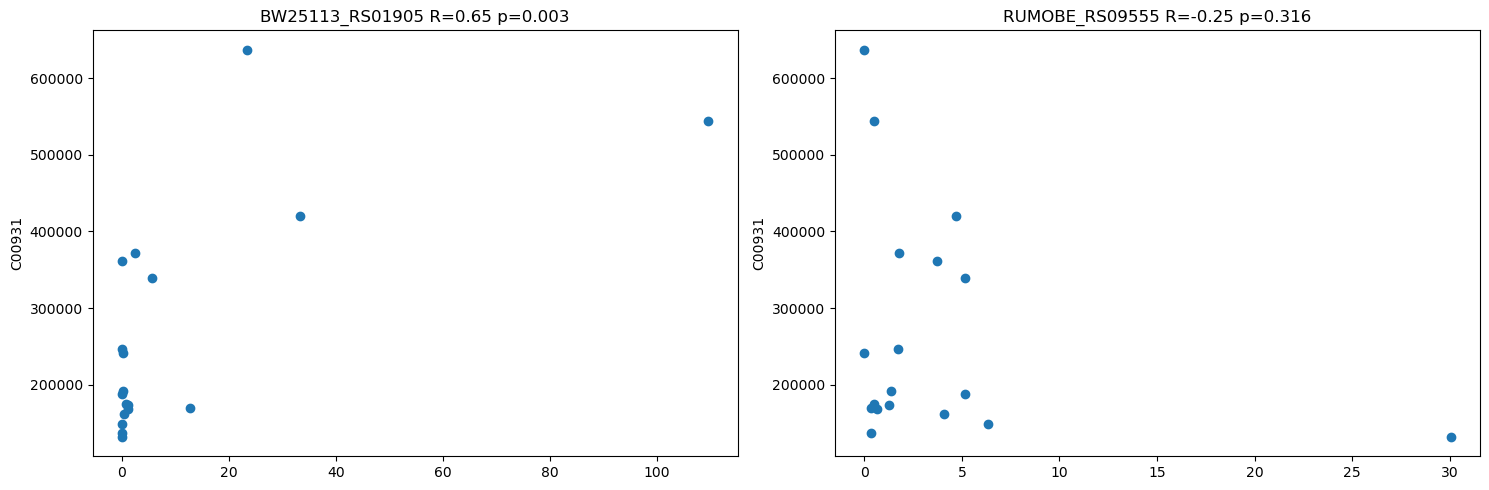

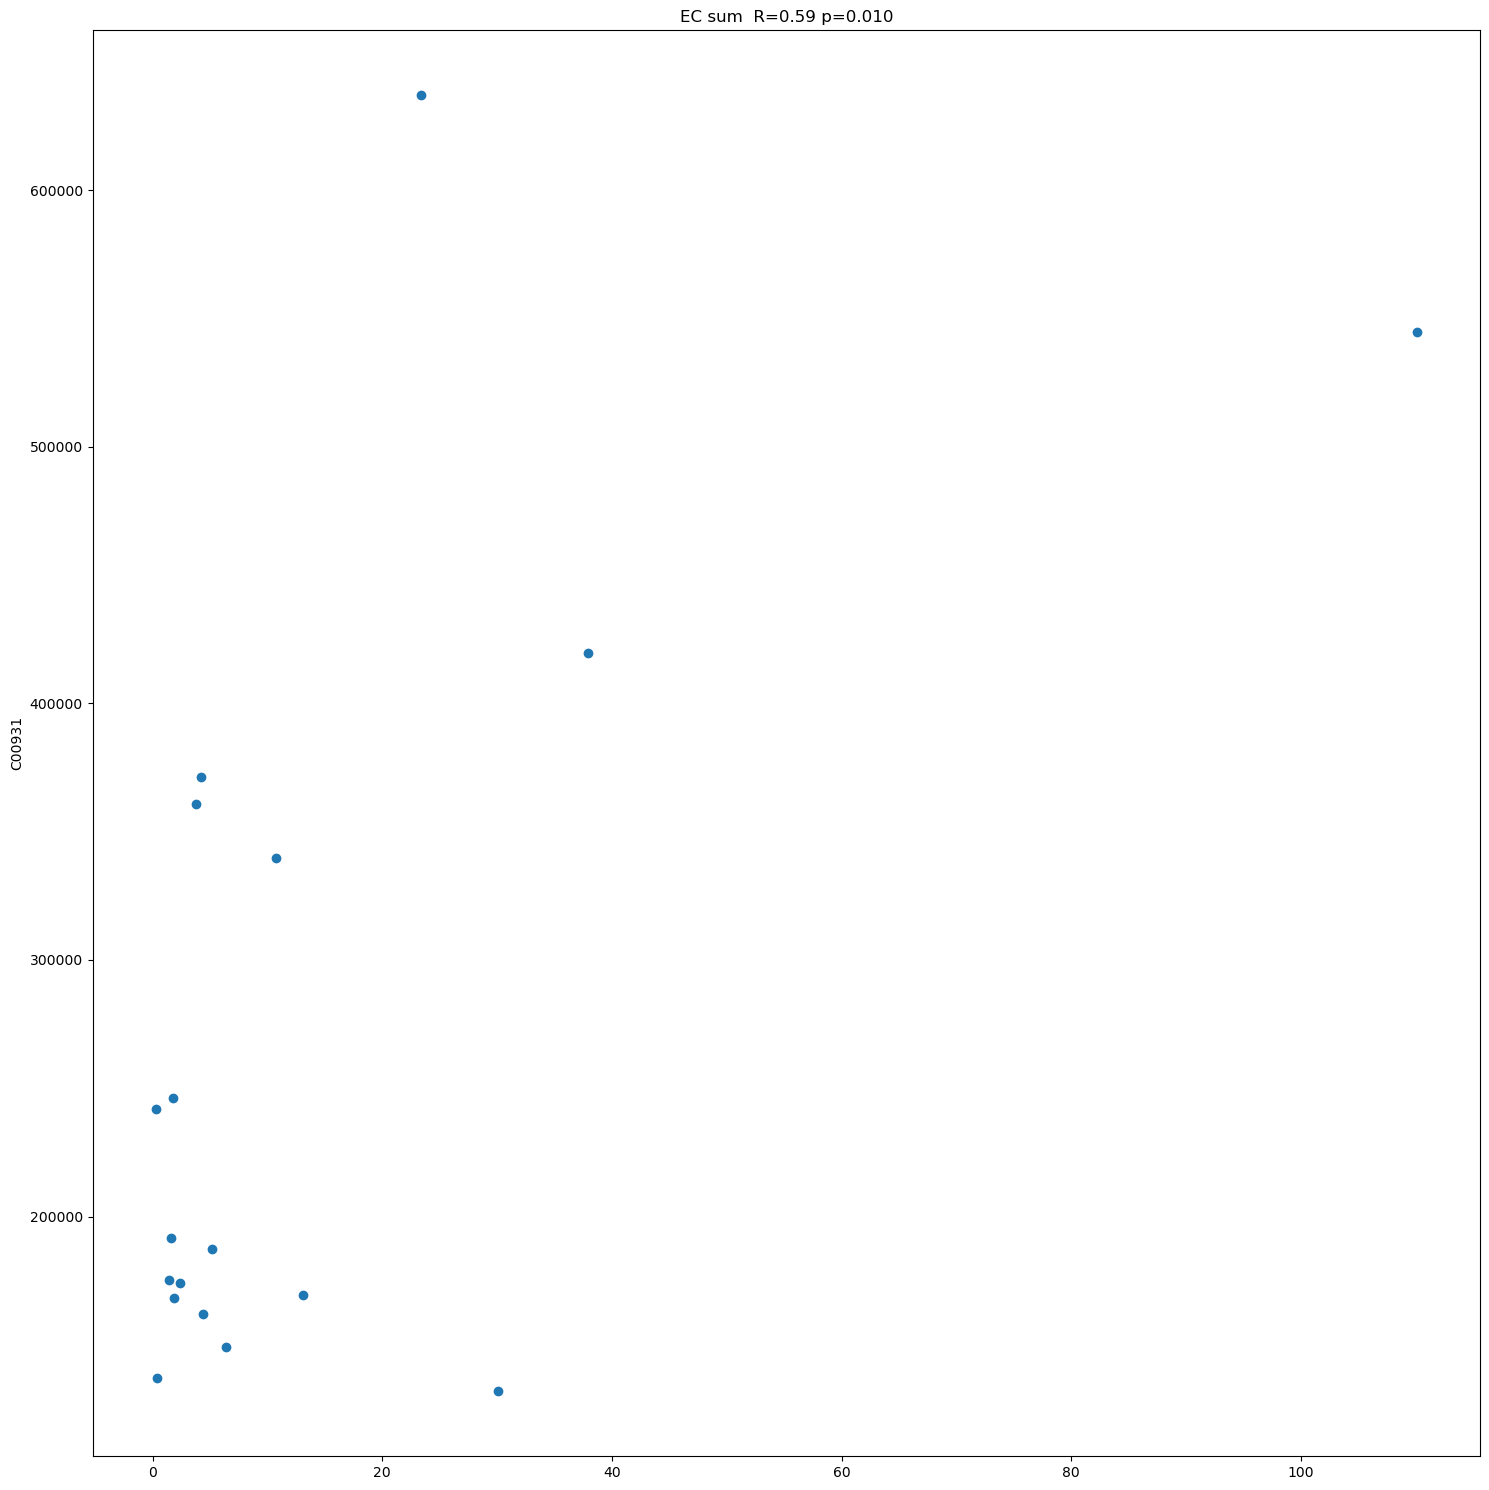

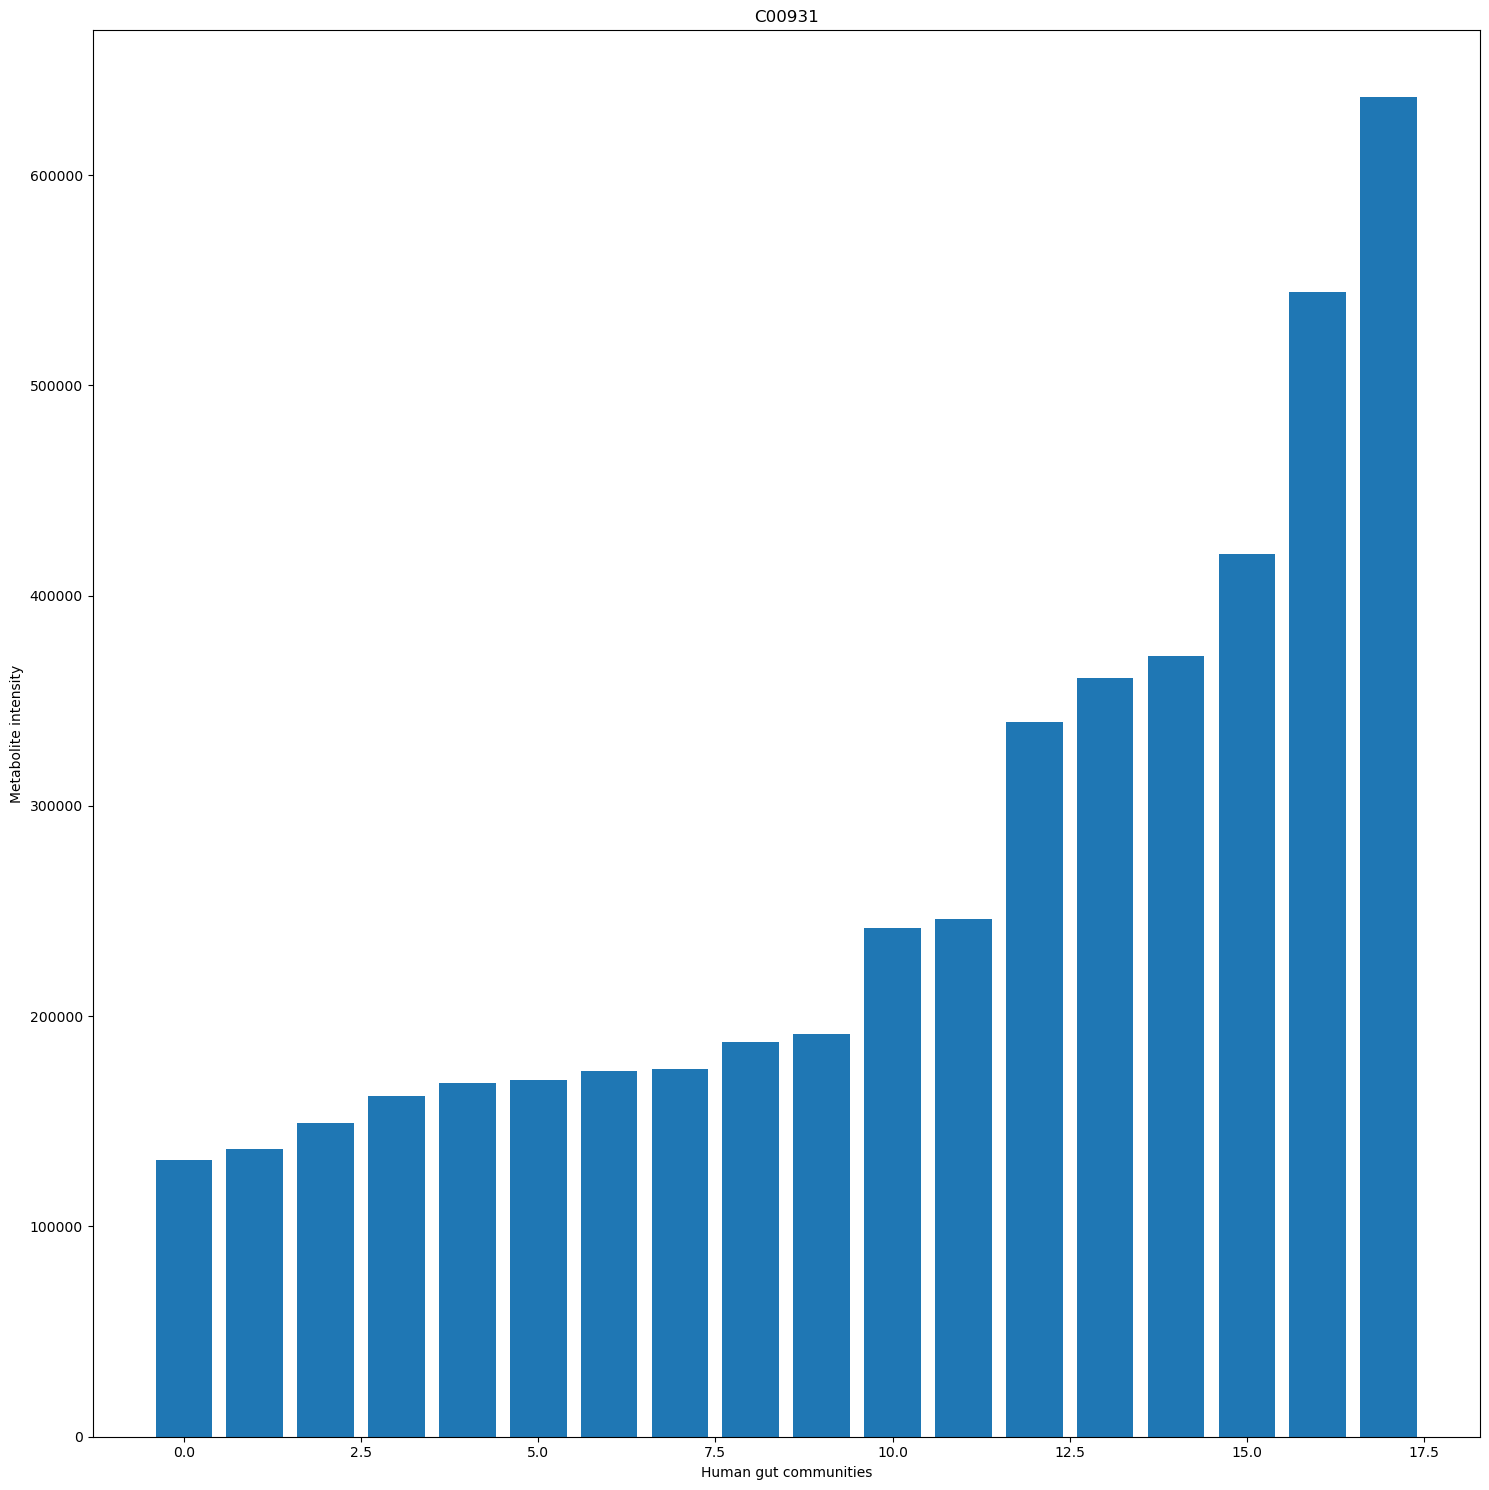

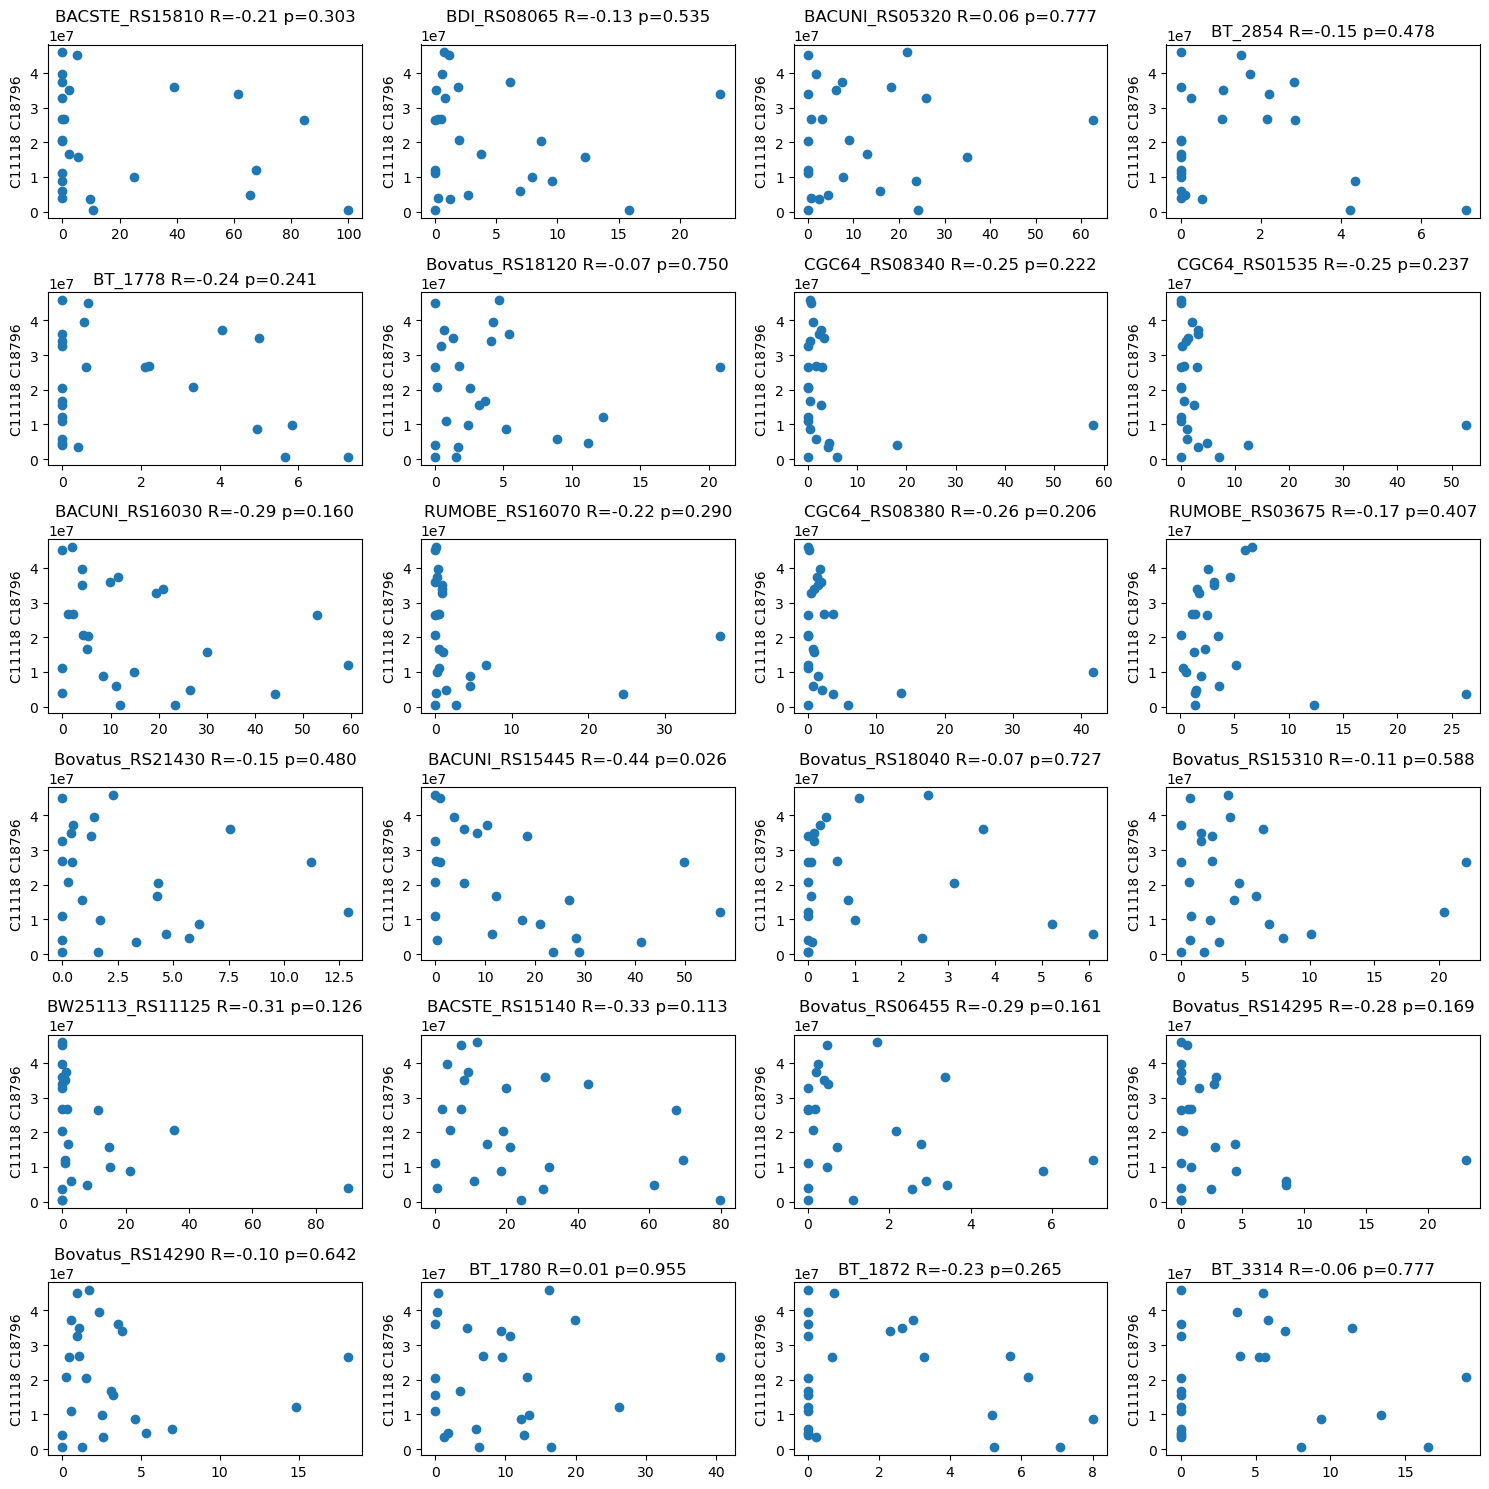

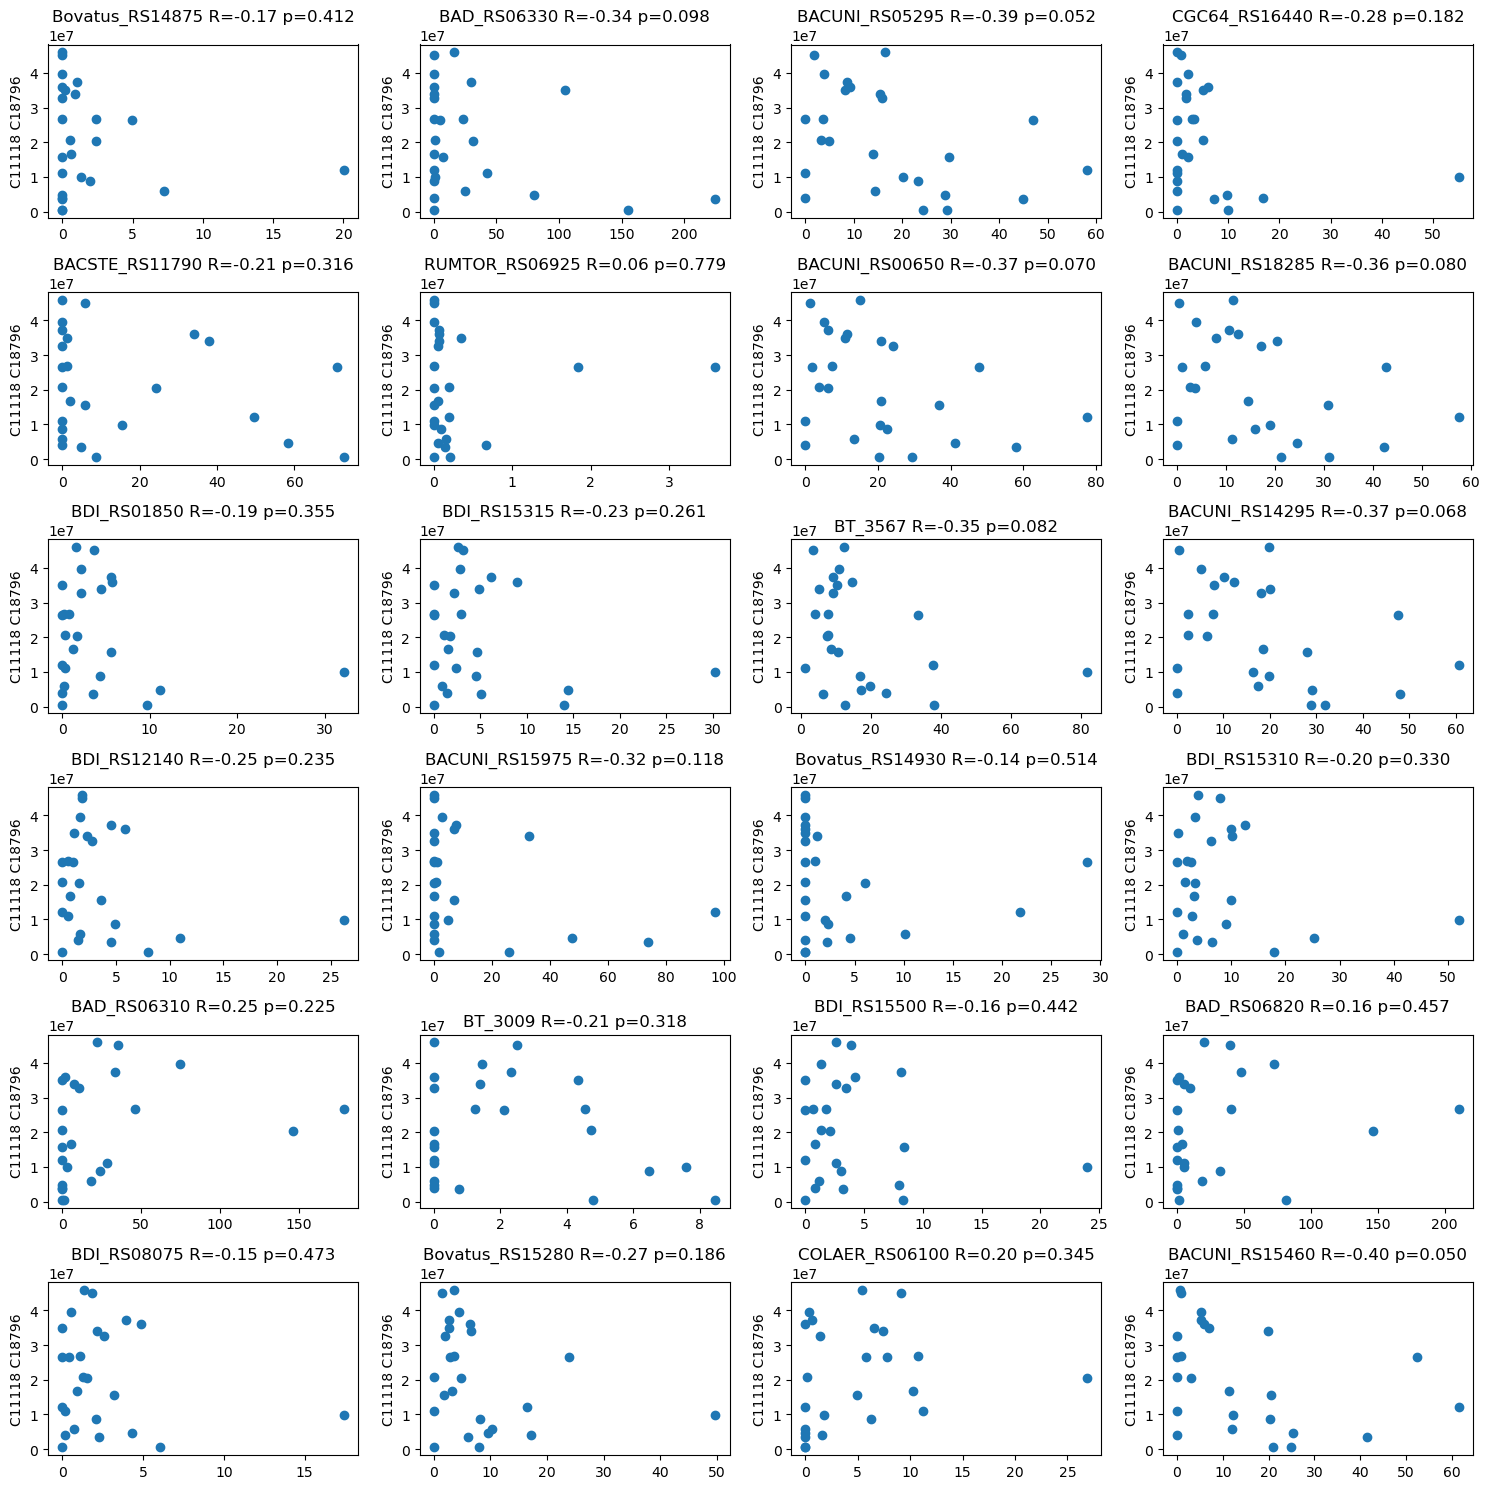

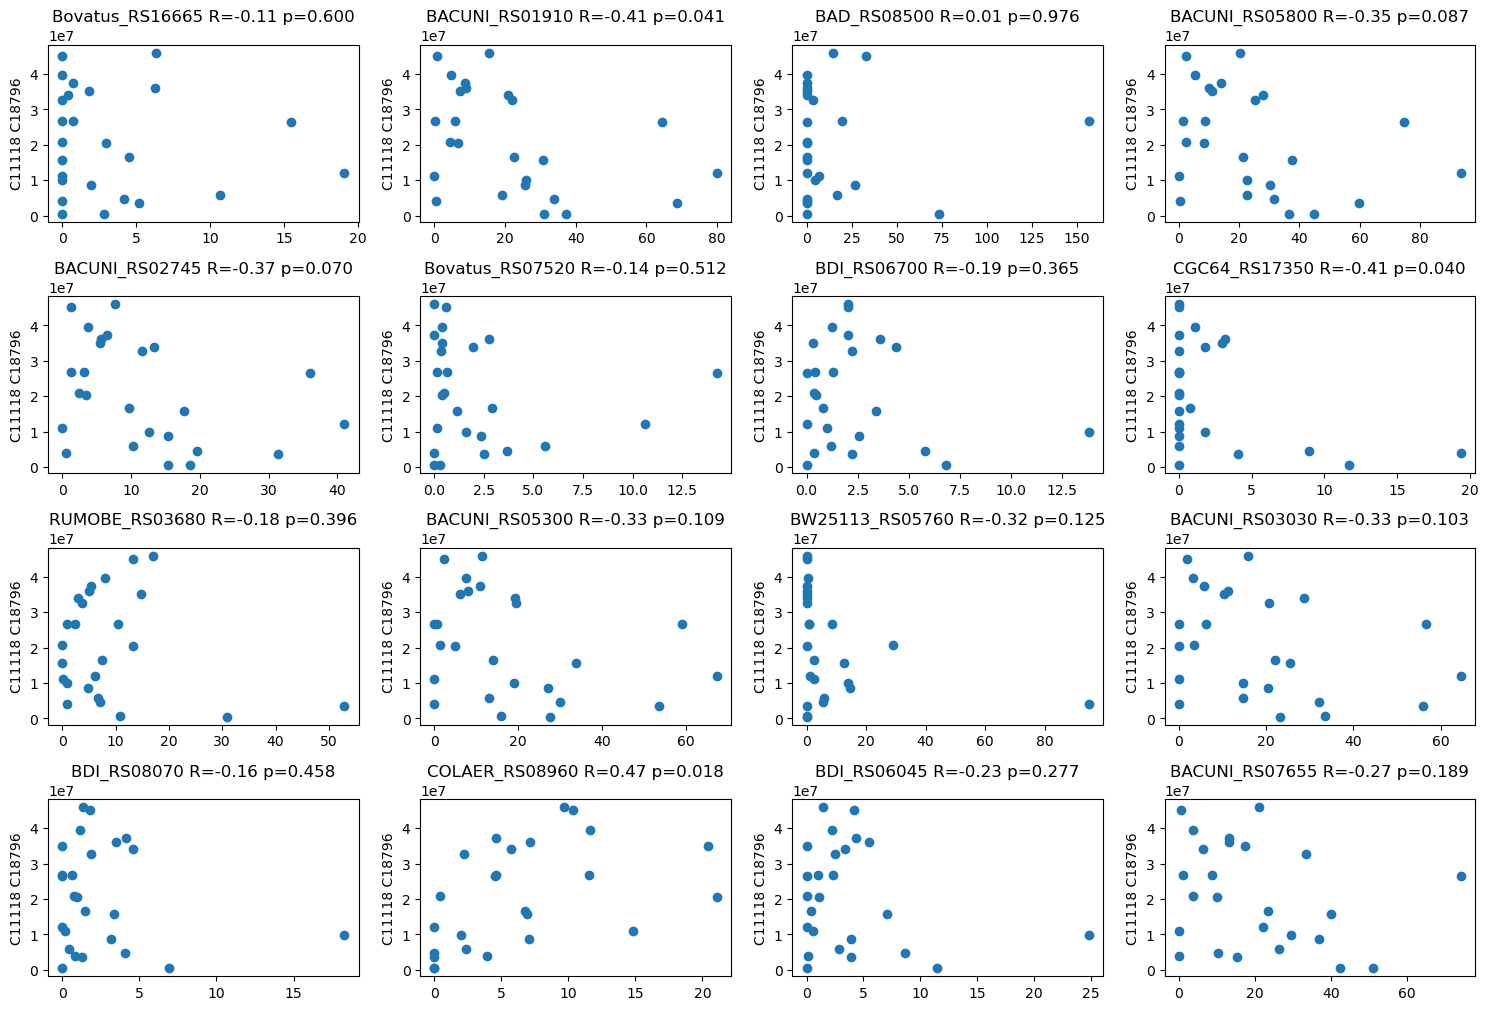

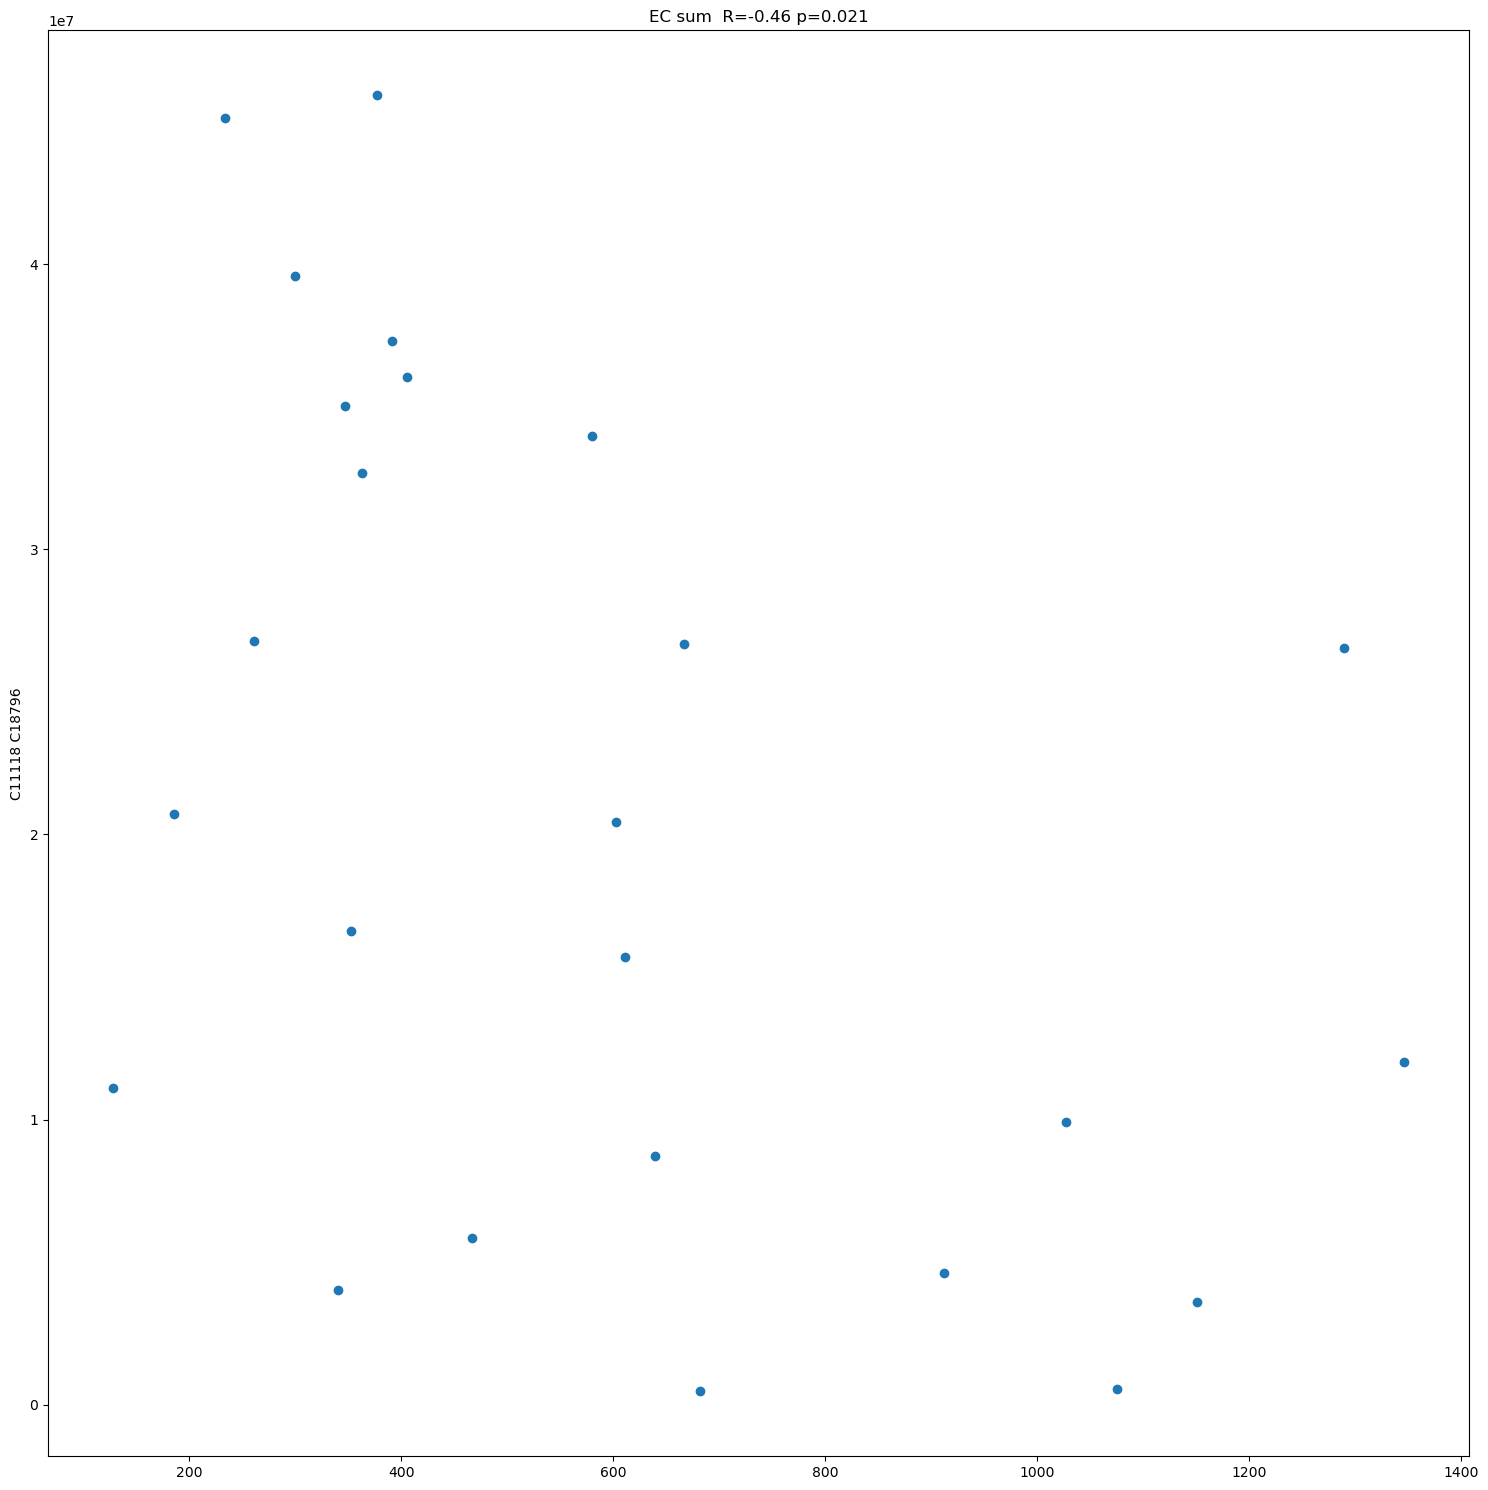

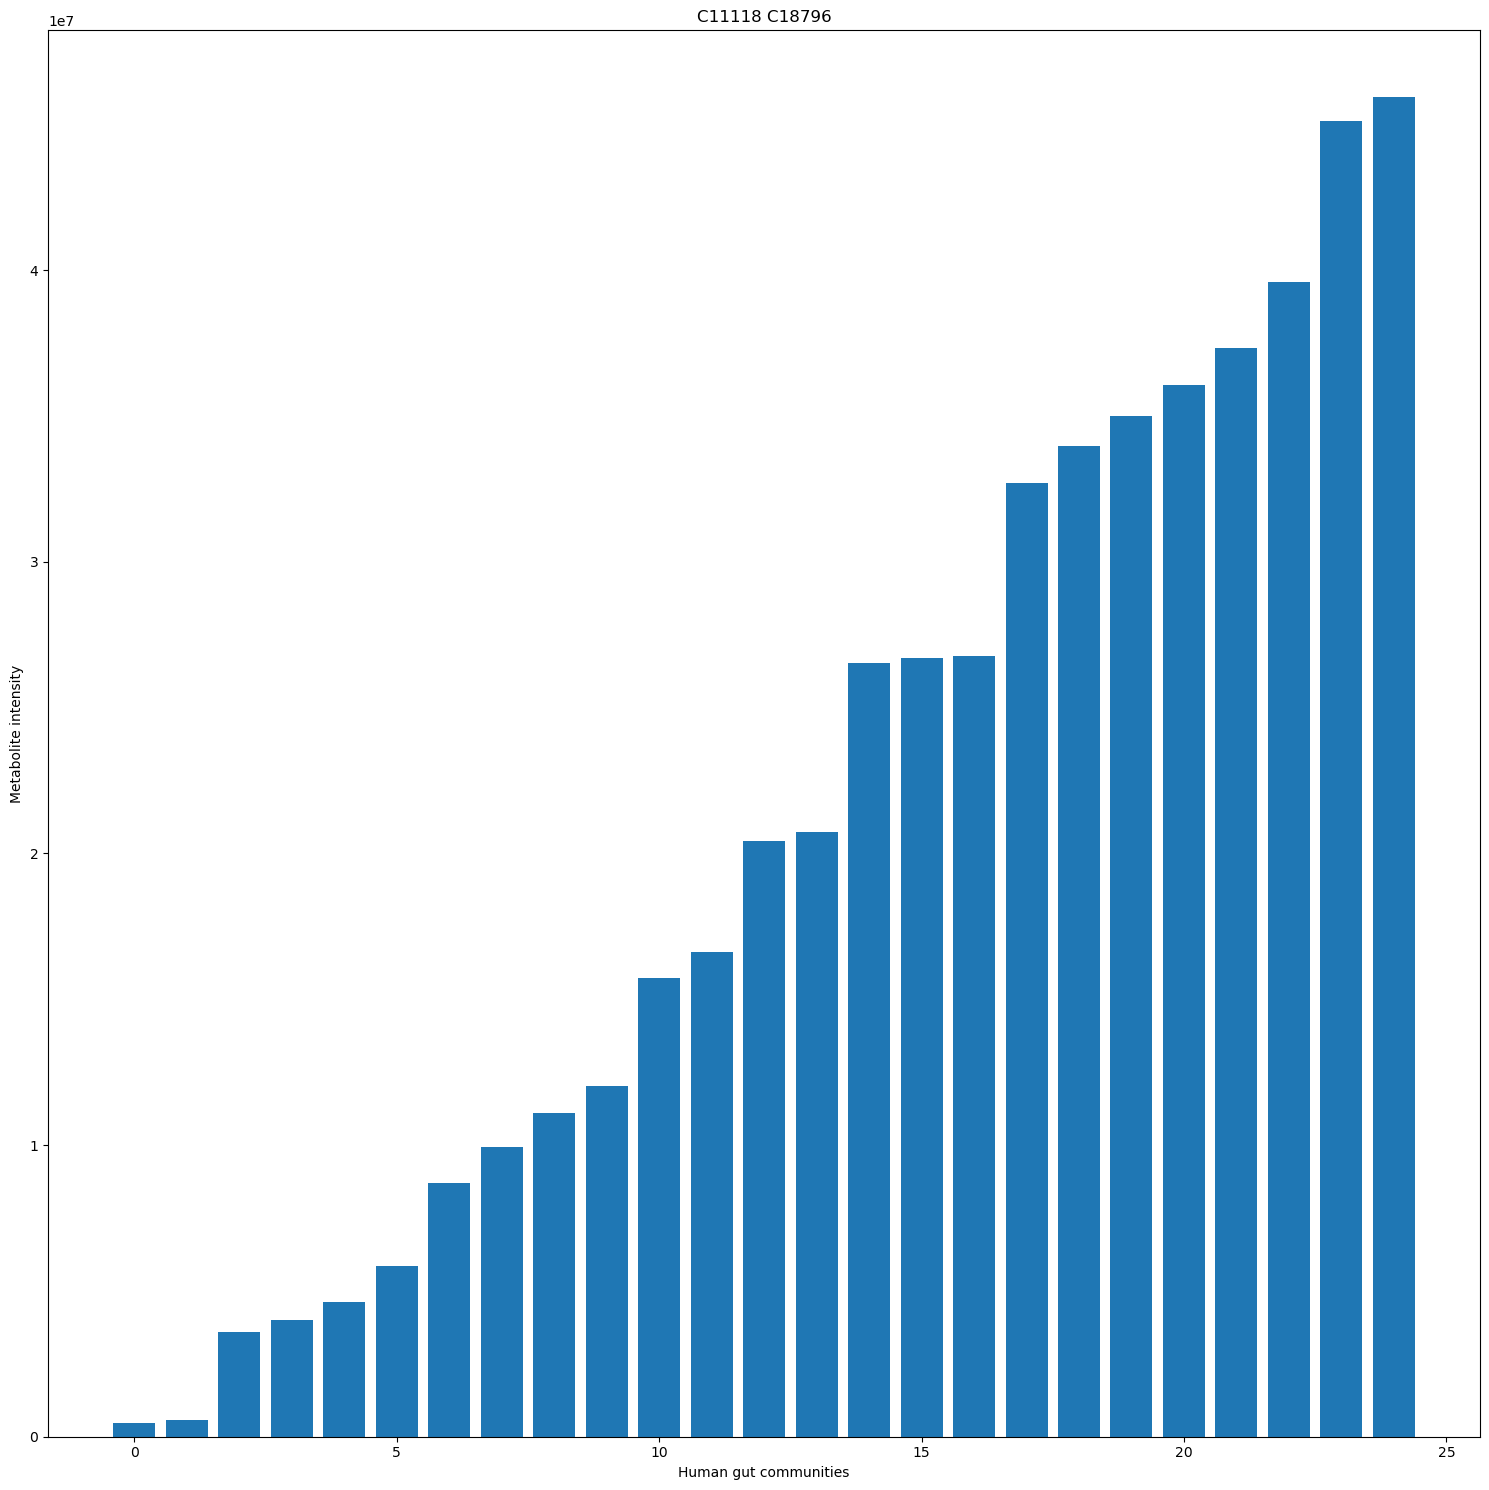

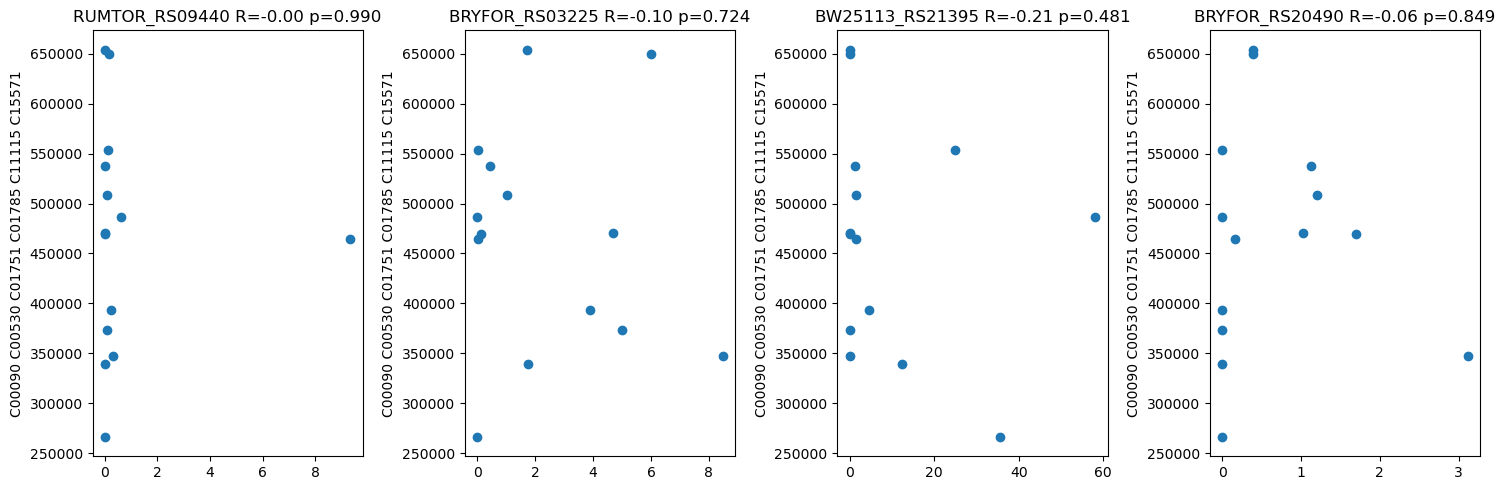

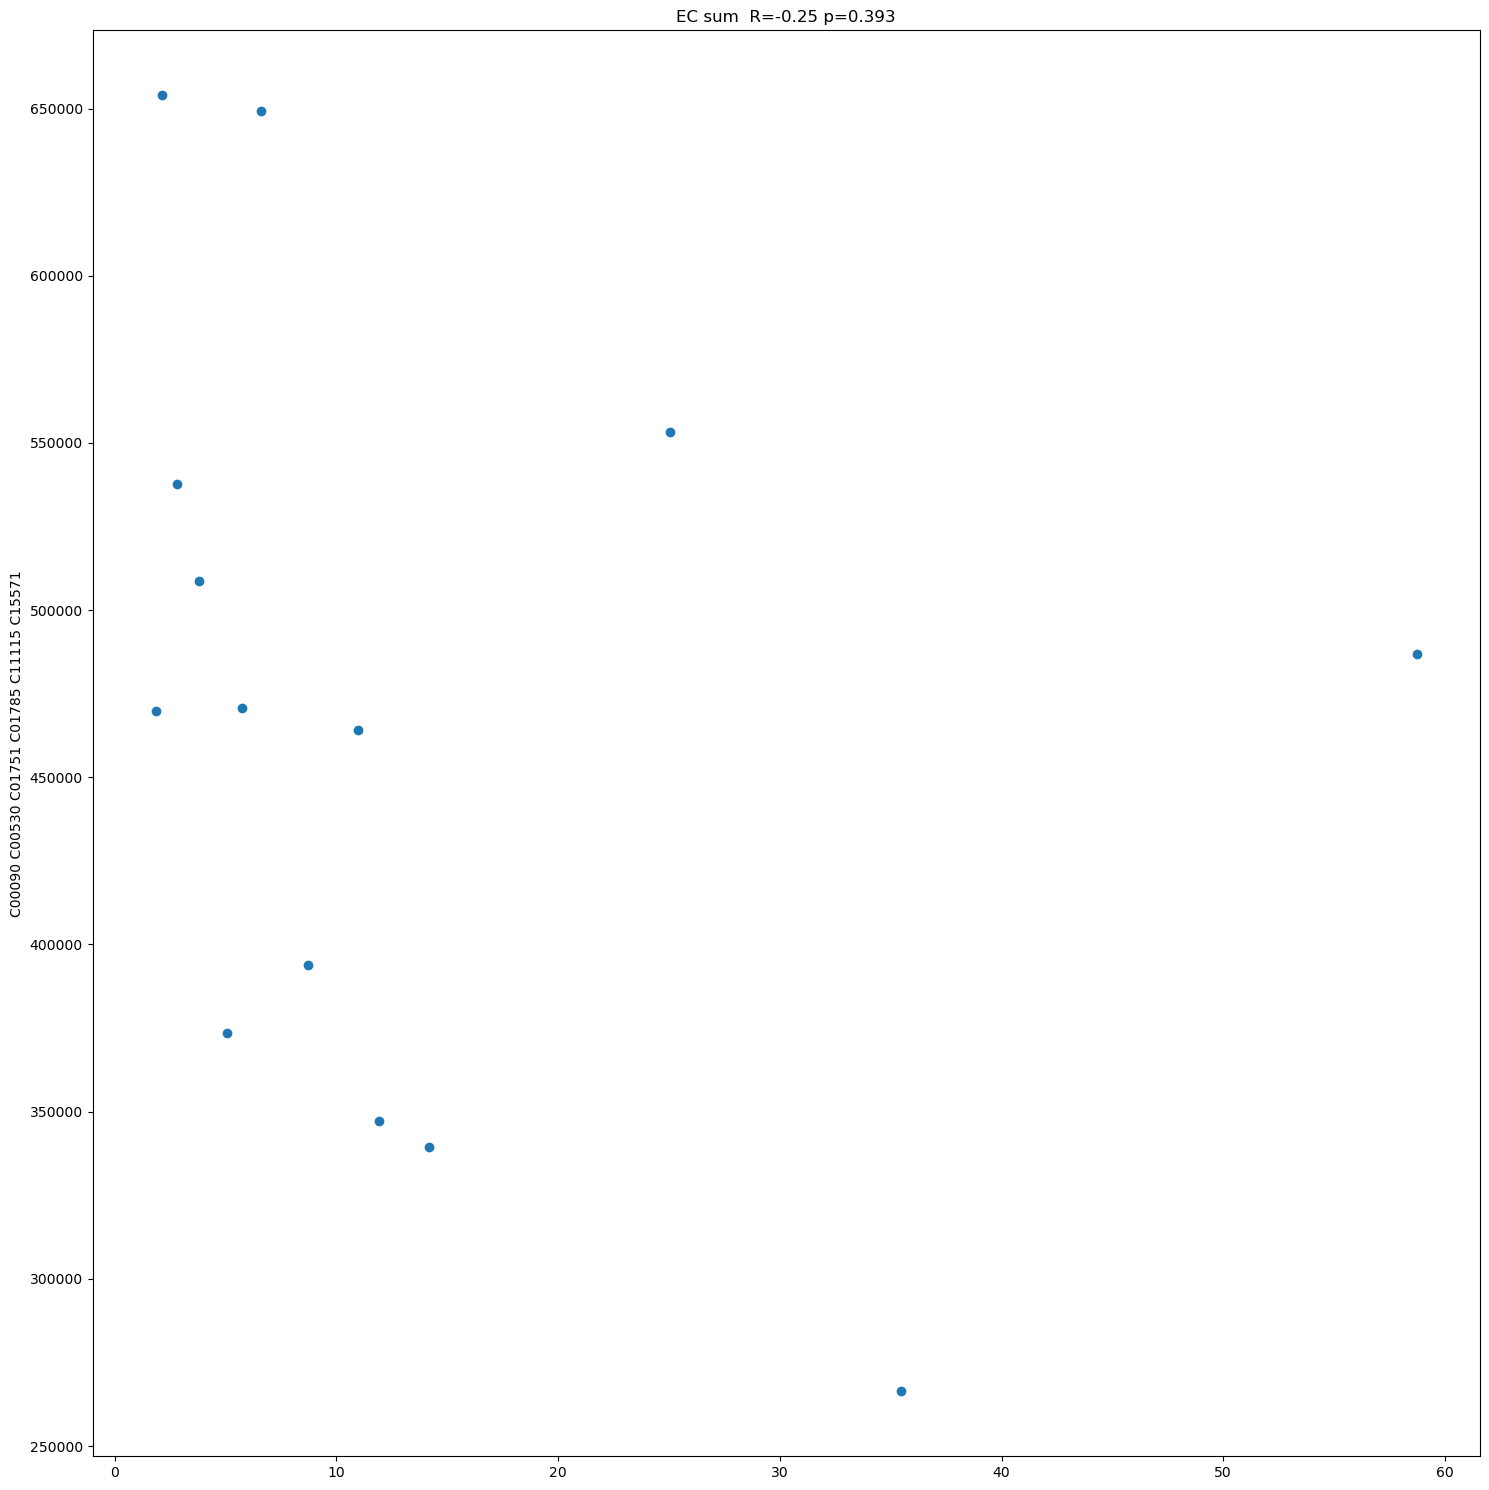

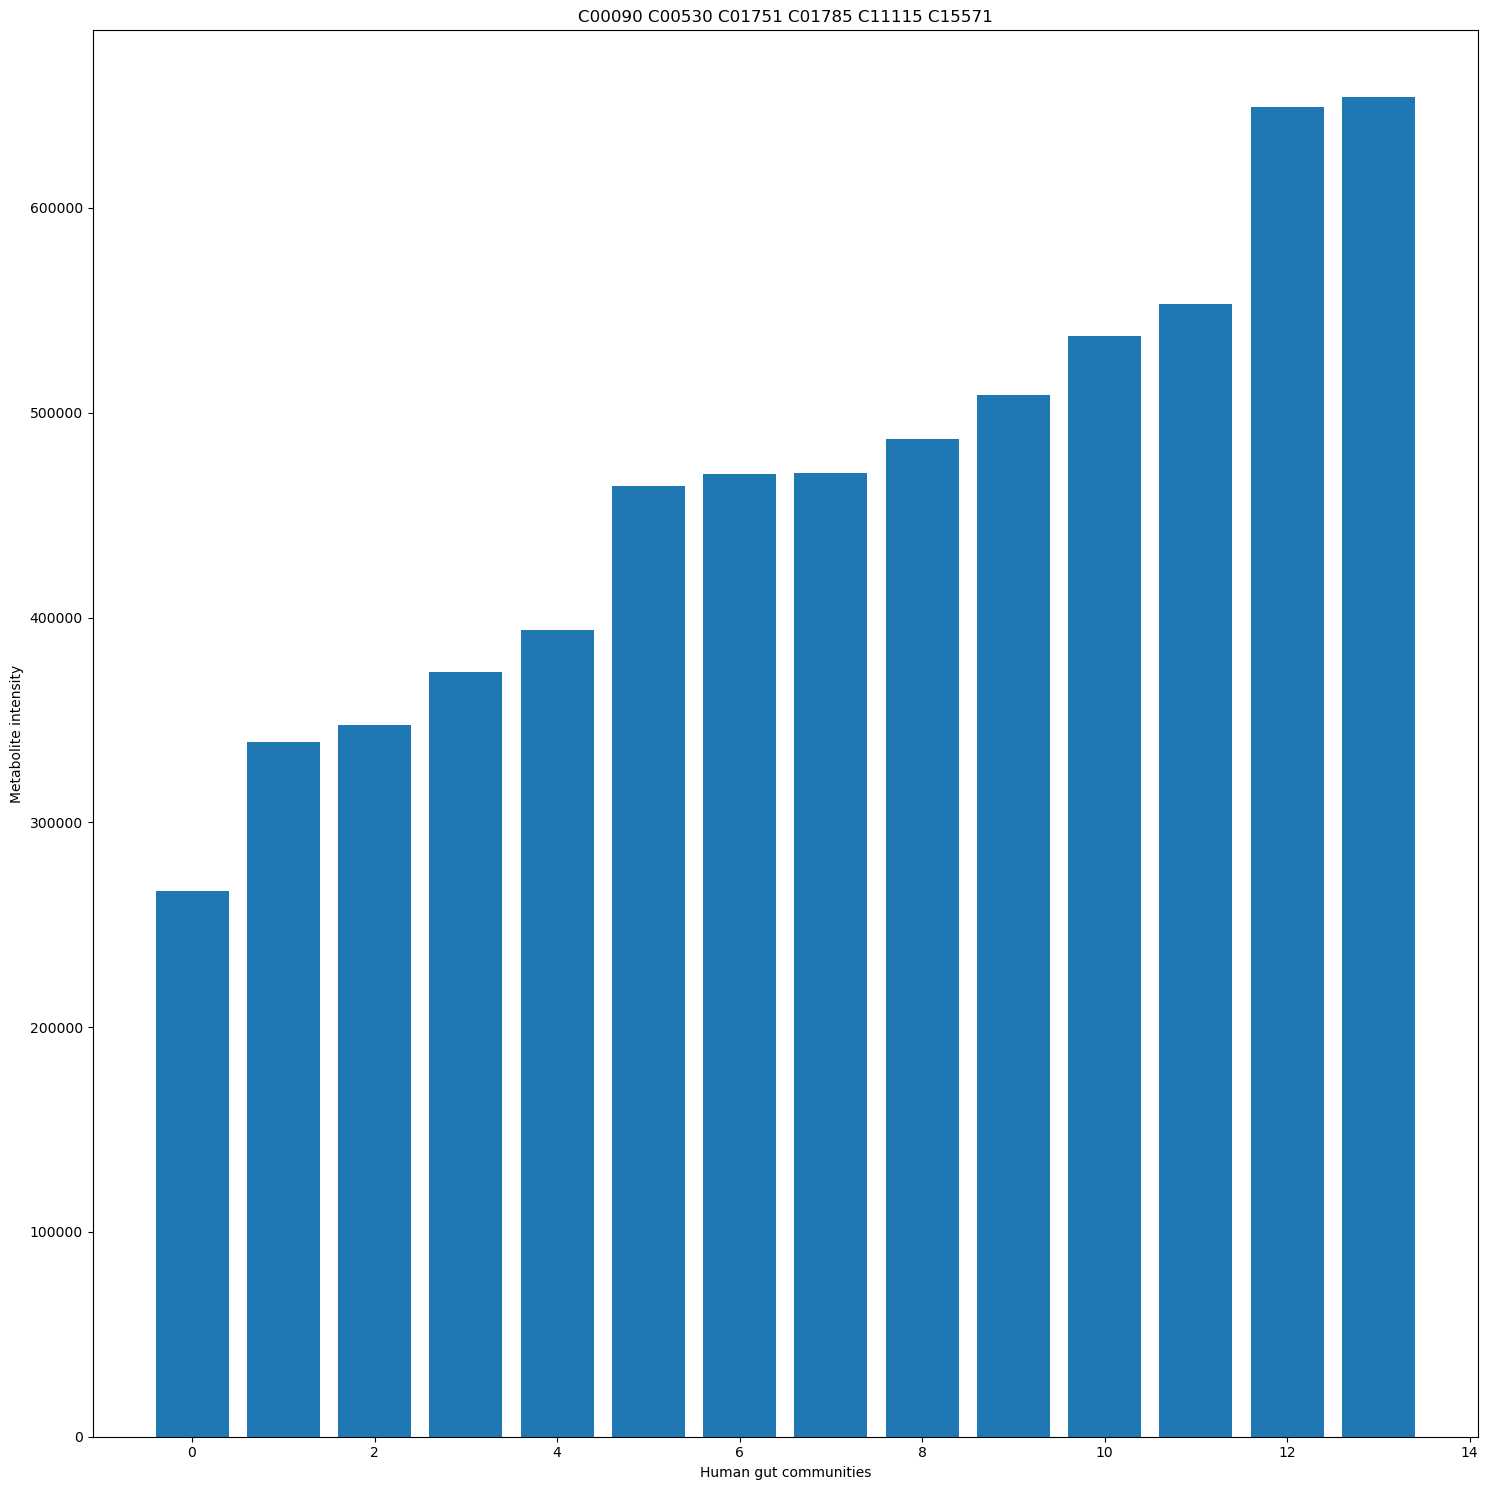

<Figure size 1500x500 with 0 Axes>

In [214]:
# save correlation coefficients between detected metabolites and enzymes
corr_mets = []
corr_genes = []
corr_coef = []
corr_pval = []
corr_mets_ecsum = []
corr_coef_ecsum = []
corr_pval_ecsum = []

# save figures to one pdf
pdf = matplotlib.backends.backend_pdf.PdfPages(figure_folder + "met_ec_products_upd_atleast10genes.pdf")
for met_idx in range(curdf.shape[0]):
    cmpdid = curdf.CompoundID[met_idx]
    
    y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])
    y = [y[i] for i in range(len(y)) if np.isnan(y[i])==False]
    if len(y)>2:
        # get kegg ids from the table
        cur_keggids = [x[4:] for x in cmpdid.split(';') if x.find('cpd:')==0]

        # get genes that make metabolite as product
        cur_ec_prod = [ kegg_prod_ec[x] for x in cur_keggids if x in kegg_prod_ec]
        # flatten the list of lists
        cur_ec_prod = list(set([x for xs in cur_ec_prod for x in xs]))
        # get gene IDs for the EC numbers
        cur_ec_prod_genes = [enzyme_gene_dict[x] for x in cur_ec_prod if x in enzyme_gene_dict]
        # flatten the list of lists
        cur_ec_prod_genes = list(set([x for xs in cur_ec_prod_genes for x in xs]))
        # intersect with quantified enzymes
        cur_ec_prod_genes = list(set(cur_ec_prod_genes).intersection(shortbred_df.index))

        # filter out zero genes in all samples
        cur_ec_prod_genes = [x for x in cur_ec_prod_genes if sum(np.asarray(shortbred_df.loc[x, met_mv_id_unique]))>0]

        # filter out genes not present in at least 10 samples
        cur_ec_prod_genes = [x for x in cur_ec_prod_genes if sum(np.asarray(shortbred_df.loc[x, met_mv_id_unique])>0)>=10]
    
        #plot if there are enzumes
        if len(cur_ec_prod_genes):
            print(met_idx)

            numcols = min(4,len(cur_ec_prod_genes))
            numrows = min(6, math.ceil(len(cur_ec_prod_genes)/numcols))
            
            spi = 1
            
            if numrows>2:
                fig = plt.figure(figsize=(15, 15))
            else:
                fig = plt.figure(figsize=(15, 5))    

            for i in range (len(cur_ec_prod_genes)):
                # get curren enzyme
                enzyme_idx = cur_ec_prod_genes[i]
                x = np.asarray(shortbred_df.loc[enzyme_idx, met_mv_id_unique])
                y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])
                # remove nans from metabolites
                x = [x[i] for i in range(len(y)) if np.isnan(y[i])==False]
                y = [y[i] for i in range(len(y)) if np.isnan(y[i])==False]
                
                # break if below 10 points to correlate
                if len(x)<10:
                    continue;
                
                [curpcc, pccpval ] = pearsonr(x,y)
                # append corr coef and info on metabolite and enzyme
                corr_mets.append(' '.join(cur_keggids))
                corr_genes.append(enzyme_idx)
                corr_coef.append(curpcc)
                corr_pval.append(pccpval)

                # plot
                # check if new figure is needed
                if spi>numcols*numrows:
                    plt.tight_layout()
                    #plt.show()
                    pdf.savefig( fig )
                    fig = plt.figure(figsize=(15, 15))
                    spi = 1
                ax = fig.add_subplot(numrows,numcols,spi)
                ax.scatter(x, y)
                ax.set_title(enzyme_idx + " R=" + f'{curpcc:.2f}' + " p=" + f'{pccpval:.3f}')
                ax.set_ylabel(' '.join(cur_keggids))
                spi += 1
            plt.tight_layout()
            #plt.show()
            pdf.savefig( fig )
            #################################################
            # plot sum of all genes
            sum_genes = np.asarray(shortbred_df.loc[cur_ec_prod_genes[0], met_mv_id_unique])
            for i in range (1,len(cur_ec_prod_genes)):
                # get curren enzyme
                enzyme_idx = cur_ec_prod_genes[i]
                x = np.asarray(shortbred_df.loc[enzyme_idx, met_mv_id_unique])
                sum_genes = sum_genes + x
            x = sum_genes    
            y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])
            # remove nans from metabolites
            x = [x[i] for i in range(len(y)) if np.isnan(y[i])==False]
            y = [y[i] for i in range(len(y)) if np.isnan(y[i])==False]

            # break if below 10 points to correlate
            if len(x)<10:
                continue;

            [curpcc, pccpval ] = pearsonr(x,y)
            # append corr coef with the sum of enzymes and save met name
            corr_mets_ecsum.append(' '.join(cur_keggids))
            corr_coef_ecsum.append(curpcc)
            corr_pval_ecsum.append(pccpval)
            # plot correlation with sum of EC
            fig = plt.figure(figsize=(15, 15))
            ax = fig.add_subplot(1,1,1)
            ax.scatter(x, y)
            ax.set_title("EC sum " + " R=" + f'{curpcc:.2f}' + " p=" + f'{pccpval:.3f}')
            ax.set_ylabel(' '.join(cur_keggids))
            plt.tight_layout()
            #plt.show()
            pdf.savefig( fig )
            # plot barchart of metabolite abundances
            fig = plt.figure(figsize=(15, 15))
            ax = fig.add_subplot(1,1,1)
            ax.bar(range(len(y)), np.sort(y, axis=0))
            ax.set_title(' '.join(cur_keggids))
            ax.set_ylabel('Metabolite intensity')
            ax.set_xlabel('Human gut communities')
            
            plt.tight_layout()
            pdf.savefig( fig )
            
            
pdf.close()

In [ ]:
#corr_mets
#corr_genes = []
#corr_coef = []
#corr_pval = []

In [189]:
for i in range(len(corr_mets_ecsum)):
    print("corr between metabolite and sum of EC for ", corr_mets_ecsum[i], 
          " PCC=", corr_coef_ecsum[i], " pval=", corr_pval_ecsum[i])

corr between metabolite and sum of EC for  C00931  PCC= 0.5889217960568397  pval= 0.010125694792386779
corr between metabolite and sum of EC for  C11118 C18796  PCC= -0.4593216346111201  pval= 0.020898611625836967
corr between metabolite and sum of EC for  C00090 C00530 C01751 C01785 C11115 C15571  PCC= -0.2475623522168338  pval= 0.3934753063172935


In [190]:
from statsmodels.stats.multitest import fdrcorrection

In [191]:
fdrcorrection(corr_pval_ecsum)

(array([ True,  True, False]), array([0.03037708, 0.03134792, 0.39347531]))

In [192]:
fdrcorrection(corr_pval)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([0.2398313 , 0.55688643, 0.55688643, 0.65741188, 0.82642821,
        0.62300051, 0.5282207 , 0.82642821, 0.5282207 , 0.5282207 ,
        0.50776046, 0.55688643, 0.5282207 , 0.6129207 , 0.62300051,
        0.43972588, 0.82092297, 0.70954359, 0.43972588, 0.43972588,
        0.50776046, 0.50776046, 0.74852626, 0.98310148, 0.54546233,
        0.82642821, 0.6129207 , 0.43972588, 0.43972588, 0.50776046,
        0.55688643, 0.82642821, 0.43

In [419]:
y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])

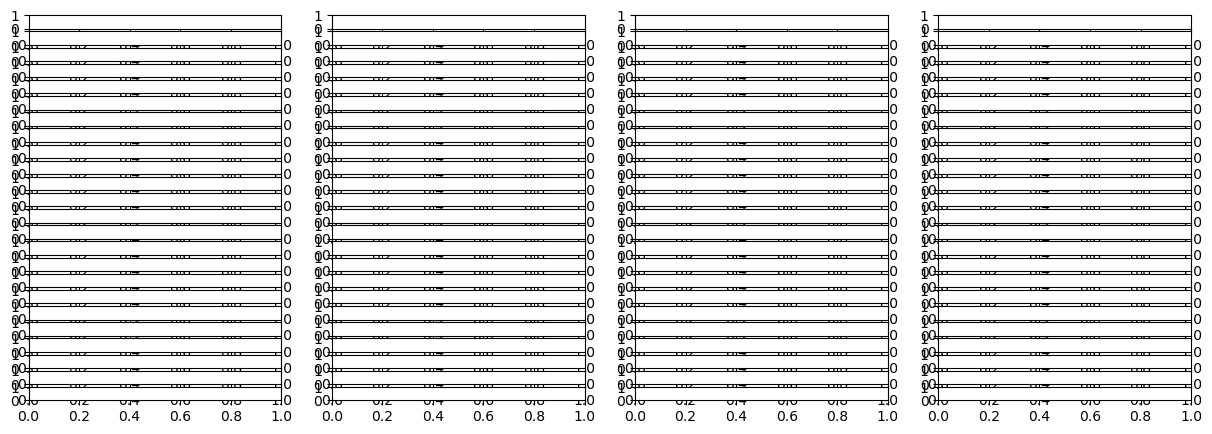

In [422]:
fig, axes = plt.subplots(numrows, numcols, figsize=(15, 5))#, sharex=True, sharey=True)


In [423]:
axes

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <A

In [424]:
hasattr(axes, "__len__")

True

In [425]:
ax = axes[0]

In [426]:
ax

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [427]:
len(cur_ec_prod_genes)

96

In [428]:
cur_ec_prod

['1.14.14.41', '3.2.1.21']

In [431]:
len(set(cur_ec_prod_genes))

96

Print correlations with substrates

84


C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


96


C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


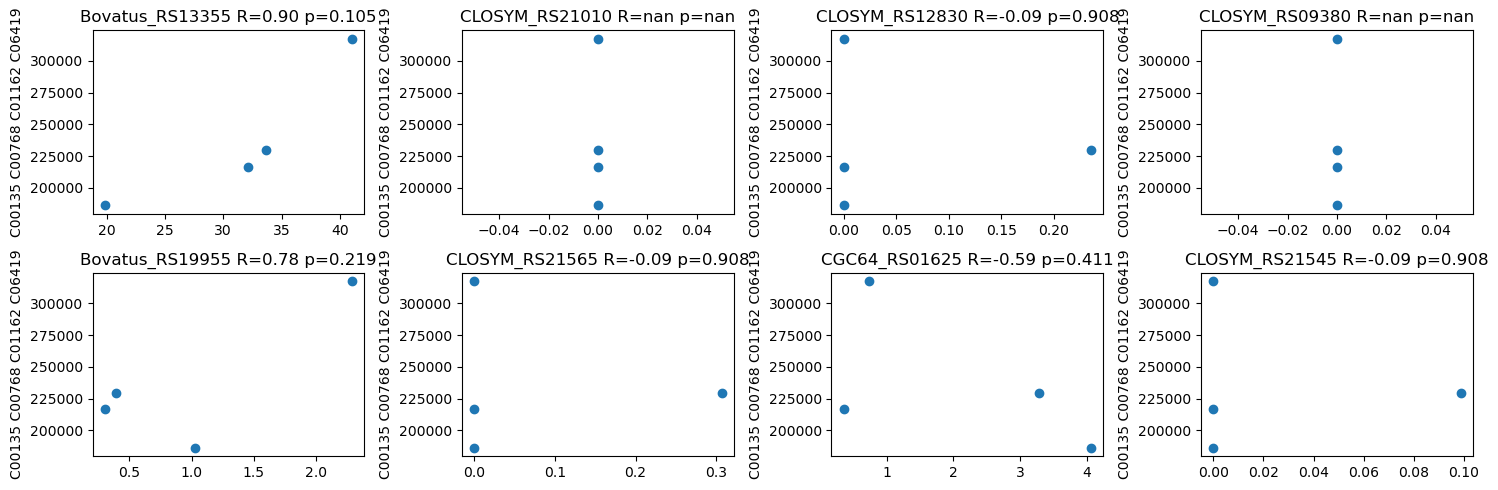

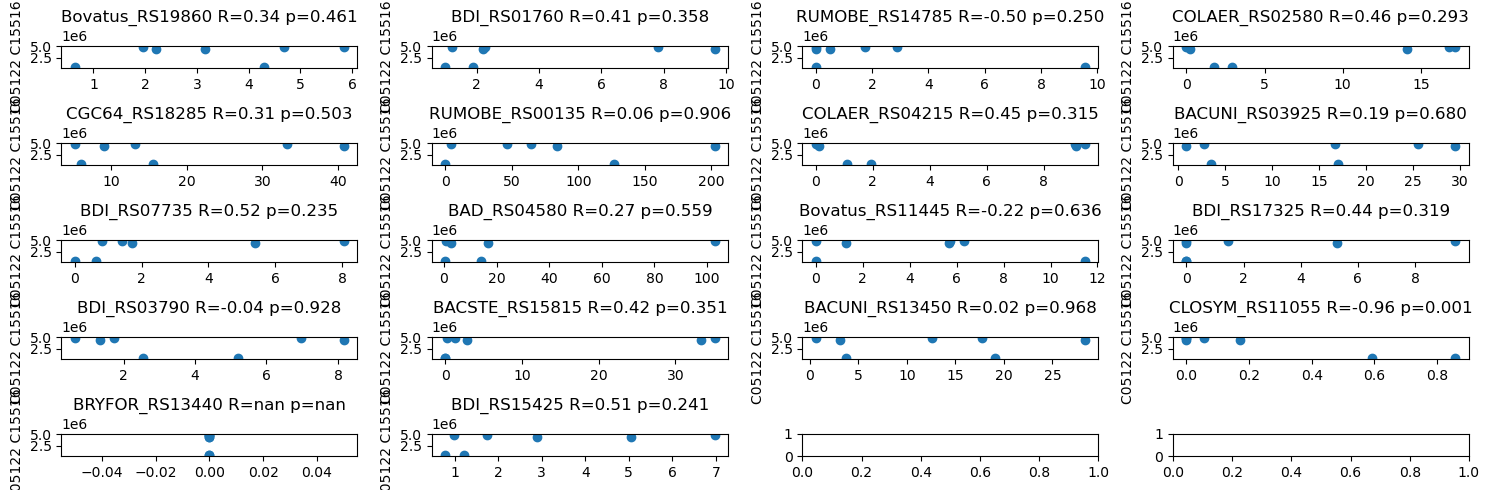

In [128]:
pdf = matplotlib.backends.backend_pdf.PdfPages(figure_folder + "met_ec_substrates.pdf")
for met_idx in range(0,curdf.shape[0]):
    cmpdid = curdf.CompoundID[met_idx]
    
    y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])
    y = [y[i] for i in range(len(y)) if np.isnan(y[i])==False]
    if len(y)>2:
        # get kegg ids from the table
        cur_keggids = [x[4:] for x in cmpdid.split(';') if x.find('cpd:')==0]

        # get genes that make metabolite as substrate
        cur_ec_sub = [ kegg_sub_ec[x] for x in cur_keggids if x in kegg_sub_ec]
        # flatten the list of lists
        cur_ec_sub = list(set([x for xs in cur_ec_sub for x in xs]))
        # get gene IDs for the EC numbers
        cur_ec_sub_genes = [enzyme_gene_dict[x] for x in cur_ec_sub if x in enzyme_gene_dict]
        # flatten the list of lists
        cur_ec_sub_genes = list(set([x for xs in cur_ec_sub_genes for x in xs]))
        # intersect with quantified enzymes
        cur_ec_sub_genes = list(set(cur_ec_sub_genes).intersection(shortbred_df.index))
        
       
        #plot if there are enzumes
        if len(cur_ec_sub_genes):
            print(met_idx)

            numcols = min(4,len(cur_ec_sub_genes))
            numrows = math.ceil(len(cur_ec_sub_genes)/numcols)
            fig, axes = plt.subplots(numrows, numcols, figsize=(15, 5))#, sharex=True, sharey=True)

            # check if axes has a length
            if hasattr(axes, "__len__") == False:
                axes = [axes]
            i = 0
            
            #flatten list of axes
            if numrows>1:
                axes = list(set([x for xs in axes for x in xs]))
            
            for ax in axes:
                # get curren enzyme
                enzyme_idx = cur_ec_sub_genes[i]
                x = np.asarray(shortbred_df.loc[enzyme_idx, met_mv_id_unique])
                y = np.asarray(curdf.loc[met_idx, met_mv_id_unique])
                x = [x[i] for i in range(len(y)) if np.isnan(y[i])==False]
                y = [y[i] for i in range(len(y)) if np.isnan(y[i])==False]
                [curpcc, pccpval ] = pearsonr(x,y)
                # plot
                ax.scatter(x, y)
                ax.set_title(enzyme_idx + " R=" + f'{curpcc:.2f}' + " p=" + f'{pccpval:.3f}')
                ax.set_ylabel(' '.join(cur_keggids))
                i += 1
                if i>=len(cur_ec_sub_genes):
                    break
            plt.tight_layout()
            #plt.show()
            pdf.savefig( fig )
pdf.close()